# State 4 - Leena Godbole
## Markdown report at the bottom for easier grading
## IAC-621
Member: (50 points)

~~Utilize Linear and Non-Linear (polynomial with degree n) regression models to compare trends for a single state (each member should choose different state) and its counties (top 5 with highest number of cases). Start your data from 2020.06.01 (Monday) to 2021.01.03 (Sunday).~~

~~X-Axis - number of days, Y-Axis number of new cases and deaths. Calcluate error using RMSE.(10 points)
Identify which counties are most at risk. Model for top 5 counties with cases within a state and describe their trends. (10 points)~~

~~Perform hypothesis tests on questions identified in Stage III. (20 points)
e.x. Does higher employment data (overall employment numbers) lead to higher covid case numbers or more rapid increase in covid cases.. Here you would compare the covid cases to the state or county level enrichment data to prove or disprove your null hypothesis. In this case there will be a two tail - two sample t-test to see if there is a difference and then one-tail - two sample t-test to show higher or lower.~~

~~you can also make 3 new hypotheses and do hypothesis tests on them.~~

~~Depending on your type of data you can also perform Chi-square test for categorical hypothesis testing.~~

For each of the aforemention analysis plot figures, the figures should include (20 points)

~~trend line (based on the datasets from 2020.06.01 (Monday) to 2021.01.03 (Sunday)).~~

~~prediction path (forecast 1 week).~~

confidence intervals (error in prediction). (Further materials you may need to explore: 

https://lmc2179.github.io/posts/confidence_prediction.html; https://www.geeksforgeeks.org/how-to-plot-a-confidence-interval-in-python/)

We'll start by importing and manipulating our covid data.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,mean_squared_error


# reading in our main Covid Data set.
df = pd.read_csv("ProjectDataStage1WIDEFORMAT.csv")
df.head()

,Unnamed: 0,countyFIPS,County Name,State,population,2020-01-22_Cases,2020-01-23_Cases,2020-01-24_Cases,2020-01-25_Cases,2020-01-26_Cases,...,2023-07-14_Deaths,2023-07-15_Deaths,2023-07-16_Deaths,2023-07-17_Deaths,2023-07-18_Deaths,2023-07-19_Deaths,2023-07-20_Deaths,2023-07-21_Deaths,2023-07-22_Deaths,2023-07-23_Deaths
0,0,0,Statewide Unallocated,AL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1001,Autauga County,AL,55869,0,0,0,0,0,...,235,235,235,235,235,235,235,235,235,235
2,2,1003,Baldwin County,AL,223234,0,0,0,0,0,...,731,731,731,731,731,731,731,731,731,731
3,3,1005,Barbour County,AL,24686,0,0,0,0,0,...,104,104,104,104,104,104,104,104,104,104
4,4,1007,Bibb County,AL,22394,0,0,0,0,0,...,111,111,111,111,111,111,111,111,111,111


In [2]:
dfmod = df.copy(deep=True)

# Create a list for our Date range of 2020-06-01 to 2021-01-03. 
col_list = [j for j in df.columns if (
    ('2020-01-22' <= j < '2020-06-01') or ('2021-01-04' <= j)) 
    and (('Cases' in j) or ('Deaths' in j))]


# Drop all columns not in our date range list.
dfmod.drop(columns=col_list, inplace=True)

# Getting data for only CALIFORNIA
dfmod = dfmod[dfmod['State']=='CA']

# top 5 identified in stage 2
counties = ['6025',
            '6031',
            '6037',
            '6107',
            '6083'
]

dfImperial = dfmod[dfmod['countyFIPS'].isin([6025])]
dfKings =dfmod[dfmod['countyFIPS'].isin([6031])]
dfLosAngeles=dfmod[dfmod['countyFIPS'].isin([6037])]
dfTulare=dfmod[dfmod['countyFIPS'].isin([6107])]
dfSantaBarbra=dfmod[dfmod['countyFIPS'].isin([6083])]

#dftest=dfmod[dfmod['countyFIPS'].isin([6025, 6031, 6037, 6107, 6083])]




# split the cases and deaths data into two seperate dataframes
c_df = dfmod.filter(like='Cases', axis=1)
d_df = dfmod.filter(like='Deaths', axis=1)

CasesImperial=dfImperial.filter(like='Cases', axis=1).T.reset_index()
CasesImperial=CasesImperial.rename(columns={CasesImperial.columns[1]: 'CasesRaw'})

CasesKings=dfKings.filter(like='Cases', axis=1).T.reset_index()
CasesKings=CasesKings.rename(columns={CasesKings.columns[1]: 'CasesRaw'})

CasesLA=dfLosAngeles.filter(like='Cases', axis=1).T.reset_index()
CasesLA=CasesLA.rename(columns={CasesLA.columns[1]: 'CasesRaw'})

CasesTulare=dfTulare.filter(like='Cases', axis=1).T.reset_index()
CasesTulare=CasesTulare.rename(columns={CasesTulare.columns[1]: 'CasesRaw'})

CasesSB=dfSantaBarbra.filter(like='Cases', axis=1).T.reset_index()
CasesSB=CasesSB.rename(columns={CasesSB.columns[1]: 'CasesRaw'})

                   
DeathsImperial= dfImperial.filter(like='Deaths', axis=1).T.reset_index()
DeathsImperial=DeathsImperial.rename(columns={DeathsImperial.columns[1]: 'DeathRaw'})

DeathsKings= dfKings.filter(like='Deaths', axis=1).T.reset_index()
DeathsKings=DeathsKings.rename(columns={DeathsKings.columns[1]: 'DeathRaw'})

DeathsLA= dfLosAngeles.filter(like='Deaths', axis=1).T.reset_index()
DeathsLA=DeathsLA.rename(columns={DeathsLA.columns[1]: 'DeathRaw'})

DeathsTulare= dfTulare.filter(like='Deaths', axis=1).T.reset_index()
DeathsTulare=DeathsTulare.rename(columns={DeathsTulare.columns[1]: 'DeathRaw'})

DeathsSB= dfSantaBarbra.filter(like='Deaths', axis=1).T.reset_index()
DeathsSB=DeathsSB.rename(columns={DeathsSB.columns[1]: 'DeathRaw'})


# Sums populations column to get total population in US.
pop = dfmod.population.sum()
popImperial= dfImperial.population.sum()
popKings= dfKings.population.sum()
popLA= dfLosAngeles.population.sum()
popTulare= dfTulare.population.sum()
popSB= dfSantaBarbra.population.sum()

# Creating a normalized case / death column in all county dataframes
CasesImperial['Cases'] = (CasesImperial['CasesRaw']/popImperial)*100000
CasesKings['Cases'] = (CasesKings['CasesRaw']/popKings)*100000
CasesLA['Cases'] = (CasesLA['CasesRaw']/popLA)*100000
CasesTulare['Cases'] = (CasesTulare['CasesRaw']/popTulare)*100000
CasesSB['Cases'] = (CasesSB['CasesRaw']/popSB)*100000

DeathsImperial['Deaths'] = (DeathsImperial['DeathRaw']/popImperial)*100000
DeathsKings['Deaths'] = (DeathsKings['DeathRaw']/popKings)*100000
DeathsLA['Deaths'] = (DeathsLA['DeathRaw']/popLA)*100000
DeathsTulare['Deaths'] = (DeathsTulare['DeathRaw']/popTulare)*100000
DeathsSB['Deaths'] = (DeathsSB['DeathRaw']/popSB)*100000



# Sums all cases and deaths columns
ctotal_US = c_df.sum(axis=0).to_frame().T # For California, not US
dtotal_US = d_df.sum(axis=0).to_frame().T # California not US


In [3]:
popImperial#print(CasesImperial.shape)

181215

In [4]:
# Convert the DataFrame to a NumPy array
carr = ctotal_US.to_numpy()
case_arr = carr[:, 1:] - carr[:, :-1]

first_column = carr[:, 0].reshape(-1, 1)
case_arr = np.hstack((first_column, case_arr))
case_arr[0, 0] = 20743

In [5]:
# converting the numpy arrat into a dataframe and transforming it.
df_casesUS_Sum = pd.DataFrame(case_arr.T, columns=['Cases'])

# Adding a new column which shows the number of days.
# at that point in time.
df_casesUS_Sum['Num_of_Days'] = df_casesUS_Sum.index + 1

# normalizing the data
df_casesUS_Sum['Cases'] = (df_casesUS_Sum.Cases/pop)*100000
df_casesUS_Sum.head()

,Cases,Num_of_Days
0,52.497679,1
1,9.351537,2
2,9.966536,3
3,8.835241,4
4,9.235117,5


In [6]:
#repeat for deaths dataframe
darr = dtotal_US.to_numpy()

death_arr = darr[:, 1:] - darr[:, :-1]
first_column = darr[:, 0].reshape(-1, 1)
death_arr = np.hstack((first_column, death_arr))
death_arr[0, 0] = 734

df_deathsUS_Sum = pd.DataFrame(death_arr.T, columns=['Deaths'])

df_deathsUS_Sum['Num_of_Days'] = df_deathsUS_Sum.index + 1

df_deathsUS_Sum['Deaths'] = (df_deathsUS_Sum.Deaths/pop)*10000000
df_deathsUS_Sum.head()

,Deaths,Num_of_Days
0,185.765301,1
1,20.246899,2
2,16.956778,3
3,22.271589,4
4,19.993813,5


In [7]:
df_casesUS_Sum.tail()

,Cases,Num_of_Days
212,148.786870,213
213,137.661199,214
214,91.184442,215
215,48.147127,216
216,94.692217,217


### Develop the models for our Linear and Non-Linear regressions for cases - CALIFORNIA


Linear Cases Regression model:



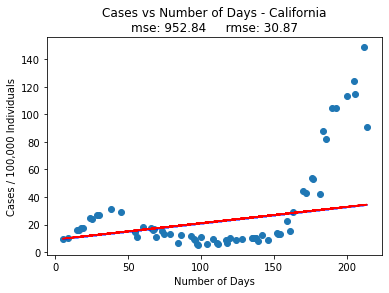

<Figure size 432x288 with 0 Axes>

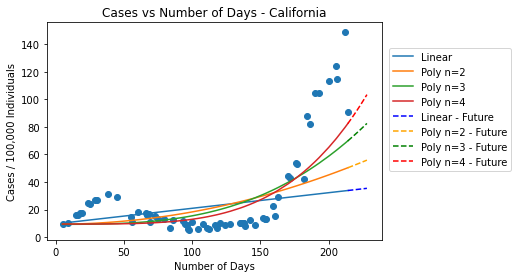

[['Linear', 952.84, 30.87], ['Poly n = 1', 963.36, 31.04], ['Poly n = 2', 709.09, 26.63], ['Poly n = 3', 482.99, 21.98], ['Poly n = 4', 373.17, 19.32]]
|    | Model      |    MSE |   RMSE |
|---:|:-----------|-------:|-------:|
|  0 | Linear     | 952.84 |  30.87 |
|  1 | Poly n = 1 | 963.36 |  31.04 |
|  2 | Poly n = 2 | 709.09 |  26.63 |
|  3 | Poly n = 3 | 482.99 |  21.98 |
|  4 | Poly n = 4 | 373.17 |  19.32 |


C:\Users\leena\anaconda3\envs\MSIA\lib\site-packages\IPython\core\interactiveshell.py:3457: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  exec(code_obj, self.user_global_ns, self.user_ns)


In [8]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.svm import SVR


# LINEAR CODE

# Set our x and y values for our models.
# x is number of days.
# y is number of new cases/deaths.
x_cases = np.array(df_casesUS_Sum.index).reshape(-1, 1)
y_cases = np.array(df_casesUS_Sum.Cases).reshape(-1, 1)

# Here we set up our train and test variables based on our x and y values.
x_train,x_test,y_train,y_test=train_test_split(x_cases, y_cases, test_size=0.3, random_state=42)

# This is our SVR training our linear model.
svr_lin = SVR(kernel="linear")
svr_lin.fit(x_train, y_train.ravel())


# Line of best fit
y_pred = svr_lin.predict(x_test)
y_predCalifornia = svr_lin.predict(x_test)



# Cases Linear model
print("\nLinear Cases Regression model:\n")
c_mse = str(round(mean_squared_error(y_true=y_test, y_pred=y_pred, squared=True),2))
c_rmse =str(round(mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False),2))



plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color = 'red')
plt.title('Cases vs Number of Days - California\nmse: ' + c_mse + '     rmse: ' + c_rmse)
plt.xlabel('Number of Days')
plt.ylabel('Cases / 100,000 Individuals')



# Define the confidence interval
ci = 1.96 * np.std(y_pred) / np.mean(x_test)

plt.fill_between(np.squeeze(x_test), (y_pred-ci), (y_pred+ci), color='blue', alpha=0.5)


plt.show()




#some confidence interval
#ci = 1.96 * np.std(y)/np.sqrt(len(x))

#fig, ax = plt.subplots()
#ax.fill_between(x, (y-ci), (y+ci), color='b', alpha=.1)


plt.savefig('CaliforniaCasesLinear.png',  bbox_inches='tight')

plt.show()

# POLYNOMIAL CODE

# This is our SVR training our non-linear model.
# this is using a poly regresion.
svr_poly1 = SVR(kernel="poly", degree=1)
svr_poly2 = SVR(kernel="poly", degree=2)
svr_poly3 = SVR(kernel="poly", degree=3)
svr_poly4 = SVR(kernel="poly", degree=4)

# Train the non linear model.
svr_poly1.fit(x_train, y_train.ravel())
svr_poly2.fit(x_train, y_train.ravel())
svr_poly3.fit(x_train, y_train.ravel())
svr_poly4.fit(x_train, y_train.ravel())

#make our pridict variables
y_predN1 = svr_poly1.predict(x_test)
y_predN2 = svr_poly2.predict(x_test)
y_predN3 = svr_poly3.predict(x_test)
y_predN4 = svr_poly4.predict(x_test)



####################################################################################################################

# Predicting for more days so you can see it better

x_future = np.array([214, 215,216,217,218,219,220, 221, 222, 223, 224, 225, 226, 227, 228])
x_future = x_future.reshape(-1,1)

# Future values
y_future1D = svr_poly1.predict(x_future)
y_future2D = svr_poly2.predict(x_future)
y_future3D = svr_poly3.predict(x_future)
y_future4D = svr_poly4.predict(x_future)

# Turn predicted arrays into a dataframe
x_future = pd.DataFrame(x_future, columns=['x_future'])
y_future1D = pd.DataFrame(y_future1D, columns = ['y_future1D'])
y_future2D = pd.DataFrame(y_future2D, columns = ['y_future2D'])
y_future3D = pd.DataFrame(y_future3D, columns = ['y_future3D'])
y_future4D = pd.DataFrame(y_future4D, columns = ['y_future4D'])

# Concatenate data frames together
poly1Future = pd.concat([x_future, y_future1D], axis=1)
poly2Future = pd.concat([x_future, y_future2D], axis=1)
poly3Future = pd.concat([x_future, y_future3D], axis=1)
poly4Future = pd.concat([x_future, y_future4D], axis=1)

#####################################################################################################################

# predict arrays values to dataframes.
x_testD = pd.DataFrame(x_test, columns=['x_test'])
y_predN1D = pd.DataFrame(y_predN1, columns=['y_predN1'])
y_predN2D = pd.DataFrame(y_predN2, columns=['y_predN2'])
y_predN3D = pd.DataFrame(y_predN3, columns=['y_predN3'])
y_predN4D = pd.DataFrame(y_predN4, columns=['y_predN4'])



# concat the predict arrays with x_test values
poly1 = pd.concat([x_testD, y_predN1D], axis=1)
poly2 = pd.concat([x_testD, y_predN2D], axis=1)
poly3 = pd.concat([x_testD, y_predN3D], axis=1)
poly4 = pd.concat([x_testD, y_predN4D], axis=1)

# Sort the values by the predict values.
poly1 = poly1.sort_values(by=['y_predN1'], ascending=True)
poly2 = poly2.sort_values(by=['y_predN2'], ascending=True)
poly3 = poly3.sort_values(by=['y_predN3'], ascending=True)
poly4 = poly4.sort_values(by=['y_predN4'], ascending=True)




# plot our values.
plt.scatter(x_test, y_test)
plt.plot(poly1.x_test, poly1.y_predN1, label="Linear")
plt.plot(poly2.x_test, poly2.y_predN2, label="Poly n=2")
plt.plot(poly3.x_test, poly3.y_predN3, label="Poly n=3")
plt.plot(poly4.x_test, poly4.y_predN4, label="Poly n=4")

plt.plot(poly1Future.x_future, poly1Future.y_future1D, label = "Linear - Future", linestyle='dashed', color = 'blue')
plt.plot(poly2Future.x_future, poly2Future.y_future2D, label = "Poly n=2 - Future", linestyle='dashed', color = 'orange')
plt.plot(poly3Future.x_future, poly3Future.y_future3D, label = "Poly n=3 - Future", linestyle='dashed', color = 'green')
plt.plot(poly4Future.x_future, poly4Future.y_future4D, label = "Poly n=4 - Future", linestyle='dashed', color = 'red')
plt.legend(bbox_to_anchor = (1.4, 0.6), loc='center right')


# Add titles and labels
plt.title('Cases vs Number of Days - California')
plt.xlabel('Number of Days')
plt.ylabel('Cases / 100,000 Individuals')

plt.savefig('CaliforniaCasesPolynomial.png',  bbox_inches='tight')
plt.show()


# working on table with RMSE and MSE for CASES

# LInear
c_mse =round(mean_squared_error(y_true=y_test, y_pred=y_pred, squared=True),2)
c_rmse =round(mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False),2)
# Cases Non Linear model
cn1_mse = round(mean_squared_error(y_true=y_test, y_pred=y_predN1, squared=True),2)
cn1_rmse = round(mean_squared_error(y_true=y_test, y_pred=y_predN1, squared=False),2)

# for n=2
cn2_mse = round(mean_squared_error(y_true=y_test, y_pred=y_predN2, squared=True),2)
cn2_rmse = round(mean_squared_error(y_true=y_test, y_pred=y_predN2, squared=False),2)

# for n=3
cn3_mse = round(mean_squared_error(y_true=y_test, y_pred=y_predN3, squared=True),2)
cn3_rmse = round(mean_squared_error(y_true=y_test, y_pred=y_predN3, squared=False),2)


# for n=4
cn4_mse = round(mean_squared_error(y_true=y_test, y_pred=y_predN4, squared=True),2)
cn4_rmse = round(mean_squared_error(y_true=y_test, y_pred=y_predN4, squared=False),2)

# Summary Table

ModelStats = [["Linear", c_mse, c_rmse],
    ["Poly n = 1",cn1_mse, cn1_rmse],
    ["Poly n = 2",cn2_mse, cn2_rmse ],
    ["Poly n = 3",cn3_mse, cn3_rmse],
    ["Poly n = 4",cn4_mse, cn4_rmse ]]
 
print(ModelStats)
df2 = pd.DataFrame(ModelStats, columns =['Model', 'MSE', 'RMSE'], dtype = float) 
                                                                                      
                                                                                                
print(df2.to_markdown())


In [9]:
x_test.T.shape

(1, 66)

### Develop the models for our Linear and Non-Linear regressions for deaths - CALIFORNIA


Linear Cases Regression model:



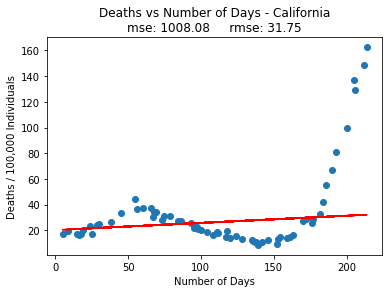

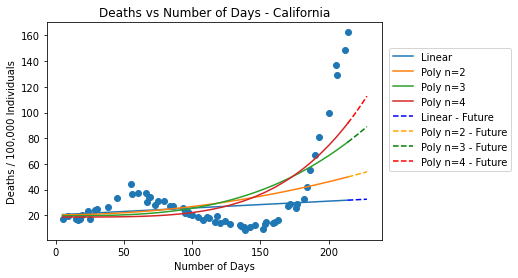

[['Linear', 1008.08, 31.75], ['Poly n = 1', 1012.94, 31.83], ['Poly n = 2', 796.81, 28.23], ['Poly n = 3', 572.3, 23.92], ['Poly n = 4', 436.57, 20.89]]
|    | Model      |     MSE |   RMSE |
|---:|:-----------|--------:|-------:|
|  0 | Linear     | 1008.08 |  31.75 |
|  1 | Poly n = 1 | 1012.94 |  31.83 |
|  2 | Poly n = 2 |  796.81 |  28.23 |
|  3 | Poly n = 3 |  572.3  |  23.92 |
|  4 | Poly n = 4 |  436.57 |  20.89 |


C:\Users\leena\anaconda3\envs\MSIA\lib\site-packages\IPython\core\interactiveshell.py:3457: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  exec(code_obj, self.user_global_ns, self.user_ns)


In [10]:
# Set our x and y values for our models.
# x is number of days.
# y is number of new cases/deaths.
x_deaths = np.array(df_deathsUS_Sum.index).reshape(-1, 1)
y_deaths = np.array(df_deathsUS_Sum.Deaths).reshape(-1, 1)

# Here we set up our train and test variables based on our x and y values.
xd_train,xd_test,yd_train,yd_test = train_test_split(x_deaths, y_deaths, test_size=0.3, random_state=42)

# This is our SVR training our linear model.
svr_lin_death = SVR(kernel="linear")
svr_lin_death.fit(xd_train, yd_train.ravel())



# This is our SVR training our non-linear model.
# this is using a poly regresion.
svr_poly1_death = SVR(kernel="poly", degree=1)
svr_poly2_death = SVR(kernel="poly", degree=2)
svr_poly3_death = SVR(kernel="poly", degree=3)
svr_poly4_death = SVR(kernel="poly", degree=4)

# Train the non linear model.
svr_poly1_death.fit(xd_train, yd_train.ravel())
svr_poly2_death.fit(xd_train, yd_train.ravel())
svr_poly3_death.fit(xd_train, yd_train.ravel())
svr_poly4_death.fit(xd_train, yd_train.ravel())

yd_pred = svr_lin_death.predict(xd_test)
svr_lin_deathCalifornia = svr_lin_death.predict(xd_test)

# Cases Linear model
print("\nLinear Cases Regression model:\n")
c_mse = str(round(mean_squared_error(y_true=yd_test, y_pred=yd_pred, squared=True),2))
c_rmse =str(round(mean_squared_error(y_true=yd_test, y_pred=yd_pred, squared=False),2))


plt.scatter(xd_test, yd_test)
plt.plot(xd_test, yd_pred, color = 'red')
plt.title('Deaths vs Number of Days - California\nmse: ' + c_mse + '     rmse: ' + c_rmse)
plt.xlabel('Number of Days')
plt.ylabel('Deaths / 100,000 Individuals')
plt.savefig('CaliforniaDeathLinear.png',  bbox_inches='tight')

plt.show()


#make our pridict variables
yd_predN1 = svr_poly1_death.predict(xd_test)
yd_predN2 = svr_poly2_death.predict(xd_test)
yd_predN3 = svr_poly3_death.predict(xd_test)
yd_predN4 = svr_poly4_death.predict(xd_test)

# predict arrays values to dataframes.
xd_testD = pd.DataFrame(xd_test, columns=['x_test'])
yd_predN1D = pd.DataFrame(yd_predN1, columns=['yd_predN1'])
yd_predN2D = pd.DataFrame(yd_predN2, columns=['yd_predN2'])
yd_predN3D = pd.DataFrame(yd_predN3, columns=['yd_predN3'])
yd_predN4D = pd.DataFrame(yd_predN4, columns=['yd_predN4'])

# concat the predict arrays with x_test values.
poly1d = pd.concat([xd_testD, yd_predN1D], axis=1)
poly2d = pd.concat([xd_testD, yd_predN2D], axis=1)
poly3d = pd.concat([xd_testD, yd_predN3D], axis=1)
poly4d = pd.concat([xd_testD, yd_predN4D], axis=1)

# Sort the values by the predict values.
poly1d = poly1d.sort_values(by=['yd_predN1'], ascending=True)
poly2d = poly2d.sort_values(by=['yd_predN2'], ascending=True)
poly3d = poly3d.sort_values(by=['yd_predN3'], ascending=True)
poly4d = poly4d.sort_values(by=['yd_predN4'], ascending=True)


####################################################################################################################

# Predicting for more days so you can see it better

x_future = np.array([214, 215,216,217,218,219,220, 221, 222, 223, 224, 225, 226, 227, 228])
x_future = x_future.reshape(-1,1)

# Future values
y_future1D = svr_poly1_death.predict(x_future)
y_future2D = svr_poly2_death.predict(x_future)
y_future3D = svr_poly3_death.predict(x_future)
y_future4D = svr_poly4_death.predict(x_future)

# Turn predicted arrays into a dataframe
x_future = pd.DataFrame(x_future, columns=['x_future'])
y_future1D = pd.DataFrame(y_future1D, columns = ['y_future1D'])
y_future2D = pd.DataFrame(y_future2D, columns = ['y_future2D'])
y_future3D = pd.DataFrame(y_future3D, columns = ['y_future3D'])
y_future4D = pd.DataFrame(y_future4D, columns = ['y_future4D'])

# Concatenate data frames together
poly1Future = pd.concat([x_future, y_future1D], axis=1)
poly2Future = pd.concat([x_future, y_future2D], axis=1)
poly3Future = pd.concat([x_future, y_future3D], axis=1)
poly4Future = pd.concat([x_future, y_future4D], axis=1)

#####################################################################################################################

# plot our values.
plt.scatter(xd_test, yd_test)
plt.plot(poly1d.x_test, poly1d.yd_predN1, label="Linear")
plt.plot(poly2d.x_test, poly2d.yd_predN2, label="Poly n=2")
plt.plot(poly3d.x_test, poly3d.yd_predN3, label="Poly n=3")
plt.plot(poly4d.x_test, poly4d.yd_predN4, label="Poly n=4")

plt.plot(poly1Future.x_future, poly1Future.y_future1D, label = "Linear - Future", linestyle='dashed', color = 'blue')
plt.plot(poly2Future.x_future, poly2Future.y_future2D, label = "Poly n=2 - Future", linestyle='dashed', color = 'orange')
plt.plot(poly3Future.x_future, poly3Future.y_future3D, label = "Poly n=3 - Future", linestyle='dashed', color = 'green')
plt.plot(poly4Future.x_future, poly4Future.y_future4D, label = "Poly n=4 - Future", linestyle='dashed', color = 'red')
plt.legend(bbox_to_anchor = (1.4, 0.6), loc='center right')

# Add titles and labels
plt.title('Deaths vs Number of Days - California')
plt.xlabel('Number of Days')
plt.ylabel('Deaths / 100,000 Individuals')


plt.savefig('CaliforniaDeathPoly.png',  bbox_inches='tight')
plt.show()


# RMSE AND MSE
# Deaths Linear model
d_mse = round(mean_squared_error(y_true=yd_test, y_pred=yd_pred, squared=True),2)
d_rmse = round(mean_squared_error(y_true=yd_test, y_pred=yd_pred, squared=False),2)


# Deaths Non Linear model
dn1_mse = round(mean_squared_error(y_true=yd_test, y_pred=yd_predN1, squared=True),2)
dn1_rmse = round(mean_squared_error(y_true=yd_test, y_pred=yd_predN1, squared=False),2)

# for n=2
dn2_mse = round(mean_squared_error(y_true=yd_test, y_pred=yd_predN2, squared=True),2)
dn2_rmse = round(mean_squared_error(y_true=yd_test, y_pred=yd_predN2, squared=False),2)


# for n=3,
dn3_mse = round(mean_squared_error(y_true=yd_test, y_pred=yd_predN3, squared=True),2)
dn3_rmse = round(mean_squared_error(y_true=yd_test, y_pred=yd_predN3, squared=False),2)


# for n=4
dn4_mse = round(mean_squared_error(y_true=yd_test, y_pred=yd_predN4, squared=True),2)
dn4_rmse =round(mean_squared_error(y_true=yd_test, y_pred=yd_predN4, squared=False),2)


# Making table out of all error values
# Calculate the skewness 

ModelStats = [["Linear", d_mse, d_rmse],
    ["Poly n = 1",dn1_mse, dn1_rmse],
    ["Poly n = 2",dn2_mse, dn2_rmse ],
    ["Poly n = 3",dn3_mse, dn3_rmse],
    ["Poly n = 4",dn4_mse, dn4_rmse ]]
 
print(ModelStats)
df2 = pd.DataFrame(ModelStats, columns =['Model', 'MSE', 'RMSE'], dtype = float) 
                                                                                      
                                                                                                
print(df2.to_markdown())



### Case models for IMPERIAL COUNTY


Linear Cases Regression model:



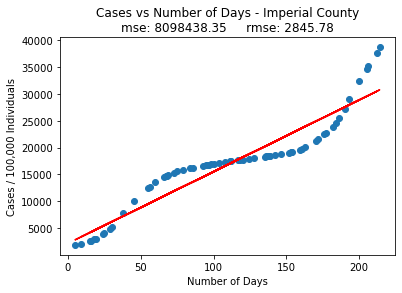

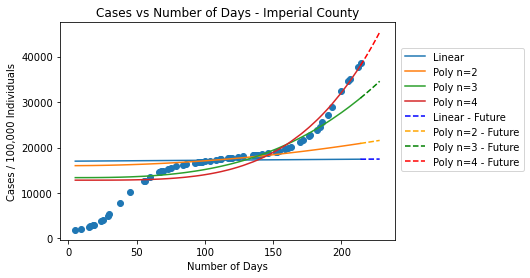

[['Linear', 8098438.35, 2845.78], ['Poly n = 1', 65441654.93, 8089.6], ['Poly n = 2', 48383384.42, 6955.82], ['Poly n = 3', 20419789.45, 4518.83], ['Poly n = 4', 17318189.79, 4161.51]]
|    | Model      |         MSE |    RMSE |
|---:|:-----------|------------:|--------:|
|  0 | Linear     | 8.09844e+06 | 2845.78 |
|  1 | Poly n = 1 | 6.54417e+07 | 8089.6  |
|  2 | Poly n = 2 | 4.83834e+07 | 6955.82 |
|  3 | Poly n = 3 | 2.04198e+07 | 4518.83 |
|  4 | Poly n = 4 | 1.73182e+07 | 4161.51 |


C:\Users\leena\anaconda3\envs\MSIA\lib\site-packages\IPython\core\interactiveshell.py:3457: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  exec(code_obj, self.user_global_ns, self.user_ns)


In [11]:
# LINEAR CODE

# Set our x and y values for our models.
# x is number of days.
# y is number of new cases/deaths.
x_cases = np.array(CasesImperial.index).reshape(-1, 1)
y_cases = np.array(CasesImperial.Cases).reshape(-1, 1)

# Here we set up our train and test variables based on our x and y values.
x_train,x_test,y_train,y_test=train_test_split(x_cases, y_cases, test_size=0.3, random_state=42)

# This is our SVR training our linear model.
svr_lin = SVR(kernel="linear")
svr_lin.fit(x_train, y_train.ravel())

y_pred = svr_lin.predict(x_test)
y_predImperial = svr_lin.predict(x_test)

# Cases Linear model
print("\nLinear Cases Regression model:\n")
c_mse = str(round(mean_squared_error(y_true=y_test, y_pred=y_pred, squared=True),2))
c_rmse =str(round(mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False),2))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color = 'red')
plt.title('Cases vs Number of Days - Imperial County\nmse: ' + c_mse + '     rmse: ' + c_rmse)
plt.xlabel('Number of Days')
plt.ylabel('Cases / 100,000 Individuals')

plt.savefig('ImperialCasesLinear.png',  bbox_inches='tight')

plt.show()

# POLYNOMIAL CODE

# This is our SVR training our non-linear model.
# this is using a poly regresion.
svr_poly1 = SVR(kernel="poly", degree=1)
svr_poly2 = SVR(kernel="poly", degree=2)
svr_poly3 = SVR(kernel="poly", degree=3)
svr_poly4 = SVR(kernel="poly", degree=4)

# Train the non linear model.
svr_poly1.fit(x_train, y_train.ravel())
svr_poly2.fit(x_train, y_train.ravel())
svr_poly3.fit(x_train, y_train.ravel())
svr_poly4.fit(x_train, y_train.ravel())

#make our pridict variables
y_predN1 = svr_poly1.predict(x_test)
y_predN2 = svr_poly2.predict(x_test)
y_predN3 = svr_poly3.predict(x_test)
y_predN4 = svr_poly4.predict(x_test)

# predict arrays values to dataframes.
x_testD = pd.DataFrame(x_test, columns=['x_test'])
y_predN1D = pd.DataFrame(y_predN1, columns=['y_predN1'])
y_predN2D = pd.DataFrame(y_predN2, columns=['y_predN2'])
y_predN3D = pd.DataFrame(y_predN3, columns=['y_predN3'])
y_predN4D = pd.DataFrame(y_predN4, columns=['y_predN4'])

# concat the predict arrays with x_test values
poly1 = pd.concat([x_testD, y_predN1D], axis=1)
poly2 = pd.concat([x_testD, y_predN2D], axis=1)
poly3 = pd.concat([x_testD, y_predN3D], axis=1)
poly4 = pd.concat([x_testD, y_predN4D], axis=1)

# Sort the values by the predict values.
poly1 = poly1.sort_values(by=['y_predN1'], ascending=True)
poly2 = poly2.sort_values(by=['y_predN2'], ascending=True)
poly3 = poly3.sort_values(by=['y_predN3'], ascending=True)
poly4 = poly4.sort_values(by=['y_predN4'], ascending=True)

####################################################################################################################

# Predicting for more days so you can see it better

x_future = np.array([214, 215,216,217,218,219,220, 221, 222, 223, 224, 225, 226, 227, 228])
x_future = x_future.reshape(-1,1)

# Future values
y_future1D = svr_poly1.predict(x_future)
y_future2D = svr_poly2.predict(x_future)
y_future3D = svr_poly3.predict(x_future)
y_future4D = svr_poly4.predict(x_future)

# Turn predicted arrays into a dataframe
x_future = pd.DataFrame(x_future, columns=['x_future'])
y_future1D = pd.DataFrame(y_future1D, columns = ['y_future1D'])
y_future2D = pd.DataFrame(y_future2D, columns = ['y_future2D'])
y_future3D = pd.DataFrame(y_future3D, columns = ['y_future3D'])
y_future4D = pd.DataFrame(y_future4D, columns = ['y_future4D'])

# Concatenate data frames together
poly1Future = pd.concat([x_future, y_future1D], axis=1)
poly2Future = pd.concat([x_future, y_future2D], axis=1)
poly3Future = pd.concat([x_future, y_future3D], axis=1)
poly4Future = pd.concat([x_future, y_future4D], axis=1)

#####################################################################################################################

# plot our values.
plt.scatter(x_test, y_test)
plt.plot(poly1.x_test, poly1.y_predN1, label="Linear")
plt.plot(poly2.x_test, poly2.y_predN2, label="Poly n=2")
plt.plot(poly3.x_test, poly3.y_predN3, label="Poly n=3")
plt.plot(poly4.x_test, poly4.y_predN4, label="Poly n=4")


plt.plot(poly1Future.x_future, poly1Future.y_future1D, label = "Linear - Future", linestyle='dashed', color = 'blue')
plt.plot(poly2Future.x_future, poly2Future.y_future2D, label = "Poly n=2 - Future", linestyle='dashed', color = 'orange')
plt.plot(poly3Future.x_future, poly3Future.y_future3D, label = "Poly n=3 - Future", linestyle='dashed', color = 'green')
plt.plot(poly4Future.x_future, poly4Future.y_future4D, label = "Poly n=4 - Future", linestyle='dashed', color = 'red')
plt.legend(bbox_to_anchor = (1.4, 0.6), loc='center right')

# Add titles and labels
plt.title('Cases vs Number of Days - Imperial County')
plt.xlabel('Number of Days')
plt.ylabel('Cases / 100,000 Individuals')

plt.savefig('ImperialCasesPolynomial.png',  bbox_inches='tight')
plt.show()


# working on table with RMSE and MSE for CASES

# LInear
c_mse =round(mean_squared_error(y_true=y_test, y_pred=y_pred, squared=True),2)
c_rmse =round(mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False),2)
# Cases Non Linear model
cn1_mse = round(mean_squared_error(y_true=y_test, y_pred=y_predN1, squared=True),2)
cn1_rmse = round(mean_squared_error(y_true=y_test, y_pred=y_predN1, squared=False),2)

# for n=2
cn2_mse = round(mean_squared_error(y_true=y_test, y_pred=y_predN2, squared=True),2)
cn2_rmse = round(mean_squared_error(y_true=y_test, y_pred=y_predN2, squared=False),2)
c_mse
# for n=3
cn3_mse = round(mean_squared_error(y_true=y_test, y_pred=y_predN3, squared=True),2)
cn3_rmse = round(mean_squared_error(y_true=y_test, y_pred=y_predN3, squared=False),2)


# for n=4
cn4_mse = round(mean_squared_error(y_true=y_test, y_pred=y_predN4, squared=True),2)
cn4_rmse = round(mean_squared_error(y_true=y_test, y_pred=y_predN4, squared=False),2)


# Calculate the skewness 

ModelStats = [["Linear", c_mse, c_rmse],
    ["Poly n = 1",cn1_mse, cn1_rmse],
    ["Poly n = 2",cn2_mse, cn2_rmse ],
    ["Poly n = 3",cn3_mse, cn3_rmse],
    ["Poly n = 4",cn4_mse, cn4_rmse ]]
 
print(ModelStats)
df2 = pd.DataFrame(ModelStats, columns =['Model', 'MSE', 'RMSE'], dtype = float) 
                                                                                      
                                                                                                
print(df2.to_markdown())



In [12]:
cn1_rmse

8089.6

### Death Models - Imperial County

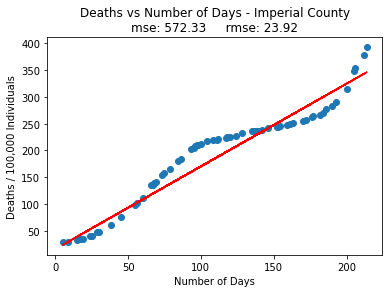

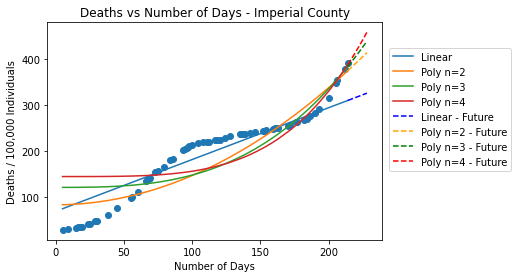

[['Linear', 572.33, 23.92], ['Poly n = 1', 998.75, 31.6], ['Poly n = 2', 1590.37, 6955.82], ['Poly n = 3', 2447.22, 49.47], ['Poly n = 4', 3144.42, 56.08]]
|    | Model      |     MSE |    RMSE |
|---:|:-----------|--------:|--------:|
|  0 | Linear     |  572.33 |   23.92 |
|  1 | Poly n = 1 |  998.75 |   31.6  |
|  2 | Poly n = 2 | 1590.37 | 6955.82 |
|  3 | Poly n = 3 | 2447.22 |   49.47 |
|  4 | Poly n = 4 | 3144.42 |   56.08 |


C:\Users\leena\anaconda3\envs\MSIA\lib\site-packages\IPython\core\interactiveshell.py:3457: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  exec(code_obj, self.user_global_ns, self.user_ns)


In [13]:
# Set our x and y values for our models.
# x is number of days.
# y is number of new cases/deaths.
x_deaths = np.array(DeathsImperial.index).reshape(-1, 1)
y_deaths = np.array(DeathsImperial['Deaths']).reshape(-1, 1)

# Here we set up our train and test variables based on our x and y values.
xd_train,xd_test,yd_train,yd_test = train_test_split(x_deaths, y_deaths, test_size=0.3, random_state=42)

# This is our SVR training our linear model.
svr_lin_death = SVR(kernel="linear")
svr_lin_death.fit(xd_train, yd_train.ravel())


# This is our SVR training our non-linear model.
# this is using a poly regresion.
svr_poly1_death = SVR(kernel="poly", degree=1)
svr_poly2_death = SVR(kernel="poly", degree=2)
svr_poly3_death = SVR(kernel="poly", degree=3)
svr_poly4_death = SVR(kernel="poly", degree=4)

# Train the non linear model.
svr_poly1_death.fit(xd_train, yd_train.ravel())
svr_poly2_death.fit(xd_train, yd_train.ravel())
svr_poly3_death.fit(xd_train, yd_train.ravel())
svr_poly4_death.fit(xd_train, yd_train.ravel())

yd_pred = svr_lin_death.predict(xd_test)
svr_lin_deathImperial = svr_lin_death.predict(xd_test)

# Cases Linear model
c_mse = str(round(mean_squared_error(y_true=yd_test, y_pred=yd_pred, squared=True),2))
c_rmse =str(round(mean_squared_error(y_true=yd_test, y_pred=yd_pred, squared=False),2))


plt.scatter(xd_test, yd_test)
plt.plot(xd_test, yd_pred, color = 'red')
plt.title('Deaths vs Number of Days - Imperial County\nmse: ' + c_mse + '     rmse: ' + c_rmse)
plt.xlabel('Number of Days')
plt.ylabel('Deaths / 100,000 Individuals')
plt.savefig('ImperialDeathLinear.png',  bbox_inches='tight')
plt.show()



#make our pridict variables
yd_predN1 = svr_poly1_death.predict(xd_test)
yd_predN2 = svr_poly2_death.predict(xd_test)
yd_predN3 = svr_poly3_death.predict(xd_test)
yd_predN4 = svr_poly4_death.predict(xd_test)

# predict arrays values to dataframes.
xd_testD = pd.DataFrame(xd_test, columns=['xd_test'])
yd_predN1D = pd.DataFrame(yd_predN1, columns=['yd_predN1'])
yd_predN2D = pd.DataFrame(yd_predN2, columns=['yd_predN2'])
yd_predN3D = pd.DataFrame(yd_predN3, columns=['yd_predN3'])
yd_predN4D = pd.DataFrame(yd_predN4, columns=['yd_predN4'])

# concat the predict arrays with x_test values.
poly1d = pd.concat([xd_testD, yd_predN1D], axis=1)
poly2d = pd.concat([xd_testD, yd_predN2D], axis=1)
poly3d = pd.concat([xd_testD, yd_predN3D], axis=1)
poly4d = pd.concat([xd_testD, yd_predN4D], axis=1)

# Sort the values by the predict values.
poly1d = poly1d.sort_values(by=['yd_predN1'], ascending=True)
poly2d = poly2d.sort_values(by=['yd_predN2'], ascending=True)
poly3d = poly3d.sort_values(by=['yd_predN3'], ascending=True)
poly4d = poly4d.sort_values(by=['yd_predN4'], ascending=True)

####################################################################################################################

# Predicting for more days so you can see it better

x_future = np.array([214, 215,216,217,218,219,220, 221, 222, 223, 224, 225, 226, 227, 228])
x_future = x_future.reshape(-1,1)

# Future values
y_future1D = svr_poly1_death.predict(x_future)
y_future2D = svr_poly2_death.predict(x_future)
y_future3D = svr_poly3_death.predict(x_future)
y_future4D = svr_poly4_death.predict(x_future)

# Turn predicted arrays into a dataframe
x_future = pd.DataFrame(x_future, columns=['x_future'])
y_future1D = pd.DataFrame(y_future1D, columns = ['y_future1D'])
y_future2D = pd.DataFrame(y_future2D, columns = ['y_future2D'])
y_future3D = pd.DataFrame(y_future3D, columns = ['y_future3D'])
y_future4D = pd.DataFrame(y_future4D, columns = ['y_future4D'])

# Concatenate data frames together
poly1Future = pd.concat([x_future, y_future1D], axis=1)
poly2Future = pd.concat([x_future, y_future2D], axis=1)
poly3Future = pd.concat([x_future, y_future3D], axis=1)
poly4Future = pd.concat([x_future, y_future4D], axis=1)

#####################################################################################################################


# plot our values.
plt.scatter(xd_test, yd_test)
plt.plot(poly1d.xd_test, poly1d.yd_predN1, label="Linear")
plt.plot(poly2d.xd_test, poly2d.yd_predN2, label="Poly n=2")
plt.plot(poly3d.xd_test, poly3d.yd_predN3, label="Poly n=3")
plt.plot(poly4d.xd_test, poly4d.yd_predN4, label="Poly n=4")

plt.plot(poly1Future.x_future, poly1Future.y_future1D, label = "Linear - Future", linestyle='dashed', color = 'blue')
plt.plot(poly2Future.x_future, poly2Future.y_future2D, label = "Poly n=2 - Future", linestyle='dashed', color = 'orange')
plt.plot(poly3Future.x_future, poly3Future.y_future3D, label = "Poly n=3 - Future", linestyle='dashed', color = 'green')
plt.plot(poly4Future.x_future, poly4Future.y_future4D, label = "Poly n=4 - Future", linestyle='dashed', color = 'red')
plt.legend(bbox_to_anchor = (1.4, 0.6), loc='center right')

# Add titles and labels
plt.title('Deaths vs Number of Days - Imperial County')
plt.xlabel('Number of Days')
plt.ylabel('Deaths / 100,000 Individuals')

#plt.legend()

plt.savefig('ImperialDeathPoly.png',  bbox_inches='tight')
plt.show()


# RMSE AND MSE
# Deaths Linear model
d_mse = round(mean_squared_error(y_true=yd_test, y_pred=yd_pred, squared=True),2)
d_rmse = round(mean_squared_error(y_true=yd_test, y_pred=yd_pred, squared=False),2)


# Deaths Non Linear model
dn1_mse = round(mean_squared_error(y_true=yd_test, y_pred=yd_predN1, squared=True),2)
dn1_rmse = round(mean_squared_error(y_true=yd_test, y_pred=yd_predN1, squared=False),2)

# for n=2
dn2_mse = round(mean_squared_error(y_true=yd_test, y_pred=yd_predN2, squared=True),2)
dn2_rmse = round(mean_squared_error(y_true=y_test, y_pred=y_predN2, squared=False),2)


# for n=3
dn3_mse = round(mean_squared_error(y_true=yd_test, y_pred=yd_predN3, squared=True),2)
dn3_rmse =round(mean_squared_error(y_true=yd_test, y_pred=yd_predN3, squared=False),2)


# for n=4
dn4_mse = round(mean_squared_error(y_true=yd_test, y_pred=yd_predN4, squared=True),2)
dn4_rmse = round(mean_squared_error(y_true=yd_test, y_pred=yd_predN4, squared=False),2)


# Making table out of all error values
# Calculate the skewness 

ModelStats = [["Linear", d_mse, d_rmse],
    ["Poly n = 1",dn1_mse, dn1_rmse],
    ["Poly n = 2",dn2_mse, dn2_rmse ],
    ["Poly n = 3",dn3_mse, dn3_rmse],
    ["Poly n = 4",dn4_mse, dn4_rmse ]]
 
print(ModelStats)
df2 = pd.DataFrame(ModelStats, columns =['Model', 'MSE', 'RMSE'], dtype = float) 
                                                                                      
                                                                                                
print(df2.to_markdown())

In [14]:
poly1d

,xd_test,yd_predN1
61,5,74.312748
13,9,78.831268
4,15,85.609047
27,16,86.738677
17,18,88.997937
...,...,...
29,200,294.590575
0,205,300.238724
8,206,301.368354
47,212,308.146134


### Case Models - Kings County


Linear Cases Regression model:



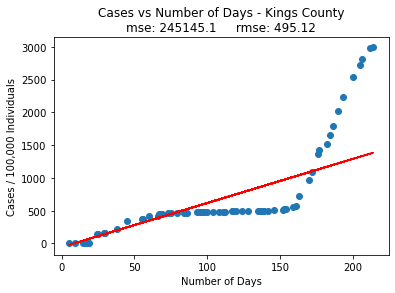

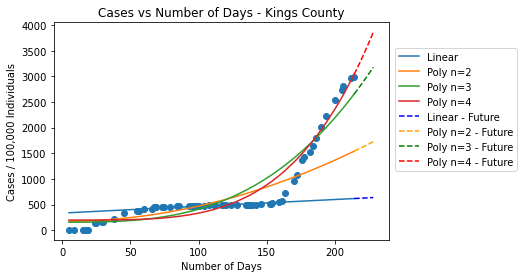

[['Linear', 245145.1, 495.12], ['Poly n = 1', 536862.06, 732.71], ['Poly n = 2', 199615.9, 446.78], ['Poly n = 3', 72660.41, 269.56], ['Poly n = 4', 44326.72, 210.54]]
|    | Model      |      MSE |   RMSE |
|---:|:-----------|---------:|-------:|
|  0 | Linear     | 245145   | 495.12 |
|  1 | Poly n = 1 | 536862   | 732.71 |
|  2 | Poly n = 2 | 199616   | 446.78 |
|  3 | Poly n = 3 |  72660.4 | 269.56 |
|  4 | Poly n = 4 |  44326.7 | 210.54 |


C:\Users\leena\anaconda3\envs\MSIA\lib\site-packages\IPython\core\interactiveshell.py:3457: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  exec(code_obj, self.user_global_ns, self.user_ns)


In [15]:
# LINEAR CODE

# Set our x and y values for our models.
# x is number of days.
# y is number of new cases/deaths.
x_cases = np.array(CasesKings.index).reshape(-1, 1)
y_cases = np.array(CasesKings.Cases).reshape(-1, 1)

# Here we set up our train and test variables based on our x and y values.
x_train,x_test,y_train,y_test=train_test_split(x_cases, y_cases, test_size=0.3, random_state=42)

# This is our SVR training our linear model.
svr_lin = SVR(kernel="linear")
svr_lin.fit(x_train, y_train.ravel())

y_pred = svr_lin.predict(x_test)
y_predKings = svr_lin.predict(x_test)

# Cases Linear model
print("\nLinear Cases Regression model:\n")
c_mse = str(round(mean_squared_error(y_true=y_test, y_pred=y_pred, squared=True),2))
c_rmse =str(round(mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False),2))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color = 'red')
plt.title('Cases vs Number of Days - Kings County\nmse: ' + c_mse + '     rmse: ' + c_rmse)
plt.xlabel('Number of Days')
plt.ylabel('Cases / 100,000 Individuals')

plt.savefig('KingsCasesLinear.png',  bbox_inches='tight')

plt.show()


# POLYNOMIAL CODE

# This is our SVR training our non-linear model.
# this is using a poly regresion.
svr_poly1 = SVR(kernel="poly", degree=1)
svr_poly2 = SVR(kernel="poly", degree=2)
svr_poly3 = SVR(kernel="poly", degree=3)
svr_poly4 = SVR(kernel="poly", degree=4)

# Train the non linear model.
svr_poly1.fit(x_train, y_train.ravel())
svr_poly2.fit(x_train, y_train.ravel())
svr_poly3.fit(x_train, y_train.ravel())
svr_poly4.fit(x_train, y_train.ravel())

#make our pridict variables
y_predN1 = svr_poly1.predict(x_test)
y_predN2 = svr_poly2.predict(x_test)
y_predN3 = svr_poly3.predict(x_test)
y_predN4 = svr_poly4.predict(x_test)

# predict arrays values to dataframes.
x_testD = pd.DataFrame(x_test, columns=['x_test'])
y_predN1D = pd.DataFrame(y_predN1, columns=['y_predN1'])
y_predN2D = pd.DataFrame(y_predN2, columns=['y_predN2'])
y_predN3D = pd.DataFrame(y_predN3, columns=['y_predN3'])
y_predN4D = pd.DataFrame(y_predN4, columns=['y_predN4'])

# concat the predict arrays with x_test values
poly1 = pd.concat([x_testD, y_predN1D], axis=1)
poly2 = pd.concat([x_testD, y_predN2D], axis=1)
poly3 = pd.concat([x_testD, y_predN3D], axis=1)
poly4 = pd.concat([x_testD, y_predN4D], axis=1)

# Sort the values by the predict values.
poly1 = poly1.sort_values(by=['y_predN1'], ascending=True)
poly2 = poly2.sort_values(by=['y_predN2'], ascending=True)
poly3 = poly3.sort_values(by=['y_predN3'], ascending=True)
poly4 = poly4.sort_values(by=['y_predN4'], ascending=True)

####################################################################################################################

# Predicting for more days so you can see it better

x_future = np.array([214, 215,216,217,218,219,220, 221, 222, 223, 224, 225, 226, 227, 228])
x_future = x_future.reshape(-1,1)

# Future values
y_future1D = svr_poly1.predict(x_future)
y_future2D = svr_poly2.predict(x_future)
y_future3D = svr_poly3.predict(x_future)
y_future4D = svr_poly4.predict(x_future)

# Turn predicted arrays into a dataframe
x_future = pd.DataFrame(x_future, columns=['x_future'])
y_future1D = pd.DataFrame(y_future1D, columns = ['y_future1D'])
y_future2D = pd.DataFrame(y_future2D, columns = ['y_future2D'])
y_future3D = pd.DataFrame(y_future3D, columns = ['y_future3D'])
y_future4D = pd.DataFrame(y_future4D, columns = ['y_future4D'])

# Concatenate data frames together
poly1Future = pd.concat([x_future, y_future1D], axis=1)
poly2Future = pd.concat([x_future, y_future2D], axis=1)
poly3Future = pd.concat([x_future, y_future3D], axis=1)
poly4Future = pd.concat([x_future, y_future4D], axis=1)

#####################################################################################################################

# plot our values.
plt.scatter(x_test, y_test)
plt.plot(poly1.x_test, poly1.y_predN1, label="Linear")
plt.plot(poly2.x_test, poly2.y_predN2, label="Poly n=2")
plt.plot(poly3.x_test, poly3.y_predN3, label="Poly n=3")
plt.plot(poly4.x_test, poly4.y_predN4, label="Poly n=4")


plt.plot(poly1Future.x_future, poly1Future.y_future1D, label = "Linear - Future", linestyle='dashed', color = 'blue')
plt.plot(poly2Future.x_future, poly2Future.y_future2D, label = "Poly n=2 - Future", linestyle='dashed', color = 'orange')
plt.plot(poly3Future.x_future, poly3Future.y_future3D, label = "Poly n=3 - Future", linestyle='dashed', color = 'green')
plt.plot(poly4Future.x_future, poly4Future.y_future4D, label = "Poly n=4 - Future", linestyle='dashed', color = 'red')
plt.legend(bbox_to_anchor = (1.4, 0.6), loc='center right')



# Add titles and labels
plt.title('Cases vs Number of Days - Kings County')
plt.xlabel('Number of Days')
plt.ylabel('Cases / 100,000 Individuals')

plt.savefig('KingsCasesPolynomial.png',  bbox_inches='tight')
plt.show()


# working on table with RMSE and MSE for CASES

# LInear
c_mse =round(mean_squared_error(y_true=y_test, y_pred=y_pred, squared=True),2)
c_rmse =round(mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False),2)
# Cases Non Linear model
cn1_mse = round(mean_squared_error(y_true=y_test, y_pred=y_predN1, squared=True),2)
cn1_rmse = round(mean_squared_error(y_true=y_test, y_pred=y_predN1, squared=False),2)

# for n=2
cn2_mse = round(mean_squared_error(y_true=y_test, y_pred=y_predN2, squared=True),2)
cn2_rmse = round(mean_squared_error(y_true=y_test, y_pred=y_predN2, squared=False),2)

# for n=3
cn3_mse = round(mean_squared_error(y_true=y_test, y_pred=y_predN3, squared=True),2)
cn3_rmse = round(mean_squared_error(y_true=y_test, y_pred=y_predN3, squared=False),2)


# for n=4
cn4_mse = round(mean_squared_error(y_true=y_test, y_pred=y_predN4, squared=True),2)
cn4_rmse = round(mean_squared_error(y_true=y_test, y_pred=y_predN4, squared=False),2)


# Calculate the skewness 

ModelStats = [["Linear", c_mse, c_rmse],
    ["Poly n = 1",cn1_mse, cn1_rmse],
    ["Poly n = 2",cn2_mse, cn2_rmse ],
    ["Poly n = 3",cn3_mse, cn3_rmse],
    ["Poly n = 4",cn4_mse, cn4_rmse ]]
 
print(ModelStats)
df2 = pd.DataFrame(ModelStats, columns =['Model', 'MSE', 'RMSE'], dtype = float) 
                                                                                      
                                                                                                
print(df2.to_markdown())



### Death Models - Kings County

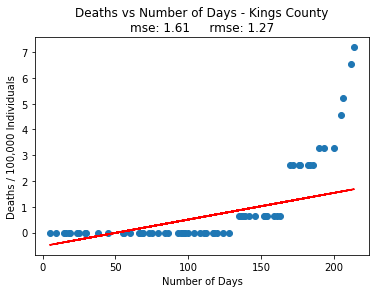

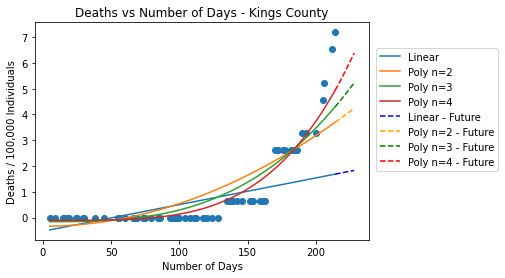

[['Linear', 1.61, 1.27], ['Poly n = 1', 1.61, 1.27], ['Poly n = 2', 0.72, 0.85], ['Poly n = 3', 0.42, 0.65], ['Poly n = 4', 0.24, 0.49]]
|    | Model      |   MSE |   RMSE |
|---:|:-----------|------:|-------:|
|  0 | Linear     |  1.61 |   1.27 |
|  1 | Poly n = 1 |  1.61 |   1.27 |
|  2 | Poly n = 2 |  0.72 |   0.85 |
|  3 | Poly n = 3 |  0.42 |   0.65 |
|  4 | Poly n = 4 |  0.24 |   0.49 |


C:\Users\leena\anaconda3\envs\MSIA\lib\site-packages\IPython\core\interactiveshell.py:3457: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  exec(code_obj, self.user_global_ns, self.user_ns)


In [16]:
# Set our x and y values for our models.
# x is number of days.
# y is number of new cases/deaths.
x_deaths = np.array(DeathsKings.index).reshape(-1, 1)
y_deaths = np.array(DeathsKings['Deaths']).reshape(-1, 1)

# Here we set up our train and test variables based on our x and y values.
xd_train,xd_test,yd_train,yd_test = train_test_split(x_deaths, y_deaths, test_size=0.3, random_state=42)

# This is our SVR training our linear model.
svr_lin_death = SVR(kernel="linear")
svr_lin_death.fit(xd_train, yd_train.ravel())


# This is our SVR training our non-linear model.
# this is using a poly regresion.
svr_poly1_death = SVR(kernel="poly", degree=1)
svr_poly2_death = SVR(kernel="poly", degree=2)
svr_poly3_death = SVR(kernel="poly", degree=3)
svr_poly4_death = SVR(kernel="poly", degree=4)

# Train the non linear model.
svr_poly1_death.fit(xd_train, yd_train.ravel())
svr_poly2_death.fit(xd_train, yd_train.ravel())
svr_poly3_death.fit(xd_train, yd_train.ravel())
svr_poly4_death.fit(xd_train, yd_train.ravel())

yd_pred = svr_lin_death.predict(xd_test)
svr_lin_deathKings = svr_lin_death.predict(xd_test)


# Cases Linear model
c_mse = str(round(mean_squared_error(y_true=yd_test, y_pred=yd_pred, squared=True),2))
c_rmse =str(round(mean_squared_error(y_true=yd_test, y_pred=yd_pred, squared=False),2))


plt.scatter(xd_test, yd_test)
plt.plot(xd_test, yd_pred, color = 'red')
plt.title('Deaths vs Number of Days - Kings County\nmse: ' + c_mse + '     rmse: ' + c_rmse)
plt.xlabel('Number of Days')
plt.ylabel('Deaths / 100,000 Individuals')
plt.savefig('KingsDeathLinear.png',  bbox_inches='tight')

plt.show()


#make our pridict variables
yd_predN1 = svr_poly1_death.predict(xd_test)
yd_predN2 = svr_poly2_death.predict(xd_test)
yd_predN3 = svr_poly3_death.predict(xd_test)
yd_predN4 = svr_poly4_death.predict(xd_test)

# predict arrays values to dataframes.
xd_testD = pd.DataFrame(xd_test, columns=['x_test'])
yd_predN1D = pd.DataFrame(yd_predN1, columns=['y_predN1'])
yd_predN2D = pd.DataFrame(yd_predN2, columns=['y_predN2'])
yd_predN3D = pd.DataFrame(yd_predN3, columns=['y_predN3'])
yd_predN4D = pd.DataFrame(yd_predN4, columns=['y_predN4'])

# concat the predict arrays with x_test values.
poly1d = pd.concat([xd_testD, yd_predN1D], axis=1)
poly2d = pd.concat([xd_testD, yd_predN2D], axis=1)
poly3d = pd.concat([xd_testD, yd_predN3D], axis=1)
poly4d = pd.concat([xd_testD, yd_predN4D], axis=1)

# Sort the values by the predict values.
poly1d = poly1d.sort_values(by=['y_predN1'], ascending=True)
poly2d = poly2d.sort_values(by=['y_predN2'], ascending=True)
poly3d = poly3d.sort_values(by=['y_predN3'], ascending=True)
poly4d = poly4d.sort_values(by=['y_predN4'], ascending=True)

####################################################################################################################

# Predicting for more days so you can see it better

x_future = np.array([214, 215,216,217,218,219,220, 221, 222, 223, 224, 225, 226, 227, 228])
x_future = x_future.reshape(-1,1)

# Future values
y_future1D = svr_poly1_death.predict(x_future)
y_future2D = svr_poly2_death.predict(x_future)
y_future3D = svr_poly3_death.predict(x_future)
y_future4D = svr_poly4_death.predict(x_future)

# Turn predicted arrays into a dataframe
x_future = pd.DataFrame(x_future, columns=['x_future'])
y_future1D = pd.DataFrame(y_future1D, columns = ['y_future1D'])
y_future2D = pd.DataFrame(y_future2D, columns = ['y_future2D'])
y_future3D = pd.DataFrame(y_future3D, columns = ['y_future3D'])
y_future4D = pd.DataFrame(y_future4D, columns = ['y_future4D'])

# Concatenate data frames together
poly1Future = pd.concat([x_future, y_future1D], axis=1)
poly2Future = pd.concat([x_future, y_future2D], axis=1)
poly3Future = pd.concat([x_future, y_future3D], axis=1)
poly4Future = pd.concat([x_future, y_future4D], axis=1)

#####################################################################################################################


# plot our values.
plt.scatter(xd_test, yd_test)
#plt.plot(xd_test, yd_pred, label = 'Linear')
plt.plot(poly1d.x_test, poly1d.y_predN1, label="Linear")
plt.plot(poly2d.x_test, poly2d.y_predN2, label="Poly n=2")
plt.plot(poly3d.x_test, poly3d.y_predN3, label="Poly n=3")
plt.plot(poly4d.x_test, poly4d.y_predN4, label="Poly n=4")

plt.plot(poly1Future.x_future, poly1Future.y_future1D, label = "Linear - Future", linestyle='dashed', color = 'blue')
plt.plot(poly2Future.x_future, poly2Future.y_future2D, label = "Poly n=2 - Future", linestyle='dashed', color = 'orange')
plt.plot(poly3Future.x_future, poly3Future.y_future3D, label = "Poly n=3 - Future", linestyle='dashed', color = 'green')
plt.plot(poly4Future.x_future, poly4Future.y_future4D, label = "Poly n=4 - Future", linestyle='dashed', color = 'red')
plt.legend(bbox_to_anchor = (1.4, 0.6), loc='center right')


# Add titles and labels
plt.title('Deaths vs Number of Days - Kings County')
plt.xlabel('Number of Days')
plt.ylabel('Deaths / 100,000 Individuals')

#plt.legend()

plt.savefig('KingsDeathPoly.png',  bbox_inches='tight')

plt.show()

# RMSE AND MSE
# Deaths Linear model
d_mse = round(mean_squared_error(y_true=yd_test, y_pred=yd_pred, squared=True),2)
d_rmse = round(mean_squared_error(y_true=yd_test, y_pred=yd_pred, squared=False),2)


# Deaths Non Linear model
dn1_mse = round(mean_squared_error(y_true=yd_test, y_pred=yd_predN1, squared=True),2)
dn1_rmse = round(mean_squared_error(y_true=yd_test, y_pred=yd_predN1, squared=False),2)

# for n=2
dn2_mse = round(mean_squared_error(y_true=yd_test, y_pred=yd_predN2, squared=True),2)
dn2_rmse = round(mean_squared_error(y_true=yd_test, y_pred=yd_predN2, squared=False),2)


# for n=3
dn3_mse = round(mean_squared_error(y_true=yd_test, y_pred=yd_predN3, squared=True),2)
dn3_rmse = round(mean_squared_error(y_true=yd_test, y_pred=yd_predN3, squared=False),2)


# for n=4
dn4_mse = round(mean_squared_error(y_true=yd_test, y_pred=yd_predN4, squared=True),2)
dn4_rmse = round(mean_squared_error(y_true=yd_test, y_pred=yd_predN4, squared=False),2)


# Making table out of all error values
# Calculate the skewness 

ModelStats = [["Linear", d_mse, d_rmse],
    ["Poly n = 1",dn1_mse, dn1_rmse],
    ["Poly n = 2",dn2_mse, dn2_rmse ],
    ["Poly n = 3",dn3_mse, dn3_rmse],
    ["Poly n = 4",dn4_mse, dn4_rmse ]]
 
print(ModelStats)
df2 = pd.DataFrame(ModelStats, columns =['Model', 'MSE', 'RMSE'], dtype = float) 
                                                                                      
                                                                                                
print(df2.to_markdown())

### Cases LA


Linear Cases Regression model:



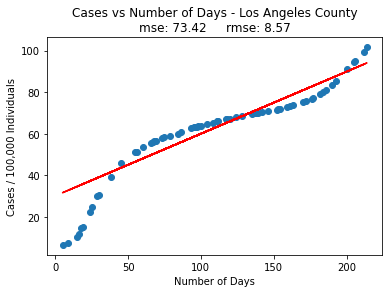

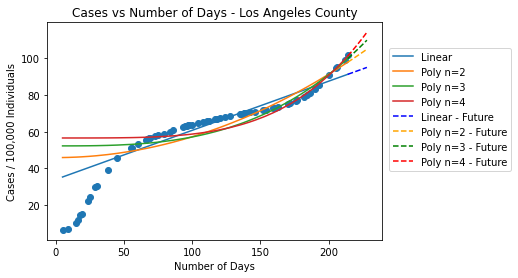

[['Linear', 73.42, 8.57], ['Poly n = 1', 90.02, 9.49], ['Poly n = 2', 156.41, 12.51], ['Poly n = 3', 216.52, 14.71], ['Poly n = 4', 265.11, 16.28]]
|    | Model      |    MSE |   RMSE |
|---:|:-----------|-------:|-------:|
|  0 | Linear     |  73.42 |   8.57 |
|  1 | Poly n = 1 |  90.02 |   9.49 |
|  2 | Poly n = 2 | 156.41 |  12.51 |
|  3 | Poly n = 3 | 216.52 |  14.71 |
|  4 | Poly n = 4 | 265.11 |  16.28 |


C:\Users\leena\anaconda3\envs\MSIA\lib\site-packages\IPython\core\interactiveshell.py:3457: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  exec(code_obj, self.user_global_ns, self.user_ns)


In [17]:
# LINEAR CODE

# Set our x and y values for our models.
# x is number of days.
# y is number of new cases/deaths.
x_cases = np.array(CasesLA.index).reshape(-1, 1)
y_cases = np.array(CasesLA.Cases).reshape(-1, 1)

# Here we set up our train and test variables based on our x and y values.
x_train,x_test,y_train,y_test=train_test_split(x_cases, y_cases, test_size=0.3, random_state=42)

# This is our SVR training our linear model.
svr_lin = SVR(kernel="linear")
svr_lin.fit(x_train, y_train.ravel())

y_pred = svr_lin.predict(x_test)
y_predLA = svr_lin.predict(x_test)

# Cases Linear model
print("\nLinear Cases Regression model:\n")
c_mse = str(round(mean_squared_error(y_true=y_test, y_pred=y_pred, squared=True),2))
c_rmse =str(round(mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False),2))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color = 'red')
plt.title('Cases vs Number of Days - Los Angeles County\nmse: ' + c_mse + '     rmse: ' + c_rmse)
plt.xlabel('Number of Days')
plt.ylabel('Cases / 100,000 Individuals')

plt.savefig('LACasesLinear.png',  bbox_inches='tight')

plt.show()

# POLYNOMIAL CODE

# This is our SVR training our non-linear model.
# this is using a poly regresion.
svr_poly1 = SVR(kernel="poly", degree=1)
svr_poly2 = SVR(kernel="poly", degree=2)
svr_poly3 = SVR(kernel="poly", degree=3)
svr_poly4 = SVR(kernel="poly", degree=4)

# Train the non linear model.
svr_poly1.fit(x_train, y_train.ravel())
svr_poly2.fit(x_train, y_train.ravel())
svr_poly3.fit(x_train, y_train.ravel())
svr_poly4.fit(x_train, y_train.ravel())

#make our pridict variables
y_predN1 = svr_poly1.predict(x_test)
y_predN2 = svr_poly2.predict(x_test)
y_predN3 = svr_poly3.predict(x_test)
y_predN4 = svr_poly4.predict(x_test)

# predict arrays values to dataframes.
x_testD = pd.DataFrame(x_test, columns=['x_test'])
y_predN1D = pd.DataFrame(y_predN1, columns=['y_predN1'])
y_predN2D = pd.DataFrame(y_predN2, columns=['y_predN2'])
y_predN3D = pd.DataFrame(y_predN3, columns=['y_predN3'])
y_predN4D = pd.DataFrame(y_predN4, columns=['y_predN4'])

# concat the predict arrays with x_test values
poly1 = pd.concat([x_testD, y_predN1D], axis=1)
poly2 = pd.concat([x_testD, y_predN2D], axis=1)
poly3 = pd.concat([x_testD, y_predN3D], axis=1)
poly4 = pd.concat([x_testD, y_predN4D], axis=1)

# Sort the values by the predict values.
poly1 = poly1.sort_values(by=['y_predN1'], ascending=True)
poly2 = poly2.sort_values(by=['y_predN2'], ascending=True)
poly3 = poly3.sort_values(by=['y_predN3'], ascending=True)
poly4 = poly4.sort_values(by=['y_predN4'], ascending=True)

####################################################################################################################

# Predicting for more days so you can see it better

x_future = np.array([214, 215,216,217,218,219,220, 221, 222, 223, 224, 225, 226, 227, 228])
x_future = x_future.reshape(-1,1)

# Future values
y_future1D = svr_poly1.predict(x_future)
y_future2D = svr_poly2.predict(x_future)
y_future3D = svr_poly3.predict(x_future)
y_future4D = svr_poly4.predict(x_future)

# Turn predicted arrays into a dataframe
x_future = pd.DataFrame(x_future, columns=['x_future'])
y_future1D = pd.DataFrame(y_future1D, columns = ['y_future1D'])
y_future2D = pd.DataFrame(y_future2D, columns = ['y_future2D'])
y_future3D = pd.DataFrame(y_future3D, columns = ['y_future3D'])
y_future4D = pd.DataFrame(y_future4D, columns = ['y_future4D'])

# Concatenate data frames together
poly1Future = pd.concat([x_future, y_future1D], axis=1)
poly2Future = pd.concat([x_future, y_future2D], axis=1)
poly3Future = pd.concat([x_future, y_future3D], axis=1)
poly4Future = pd.concat([x_future, y_future4D], axis=1)

#####################################################################################################################

# plot our values.
plt.scatter(x_test, y_test)
plt.plot(poly1.x_test, poly1.y_predN1, label="Linear")
plt.plot(poly2.x_test, poly2.y_predN2, label="Poly n=2")
plt.plot(poly3.x_test, poly3.y_predN3, label="Poly n=3")
plt.plot(poly4.x_test, poly4.y_predN4, label="Poly n=4")

plt.plot(poly1Future.x_future, poly1Future.y_future1D, label = "Linear - Future", linestyle='dashed', color = 'blue')
plt.plot(poly2Future.x_future, poly2Future.y_future2D, label = "Poly n=2 - Future", linestyle='dashed', color = 'orange')
plt.plot(poly3Future.x_future, poly3Future.y_future3D, label = "Poly n=3 - Future", linestyle='dashed', color = 'green')
plt.plot(poly4Future.x_future, poly4Future.y_future4D, label = "Poly n=4 - Future", linestyle='dashed', color = 'red')
plt.legend(bbox_to_anchor = (1.4, 0.6), loc='center right')


# Add titles and labels
plt.title('Cases vs Number of Days - Los Angeles County')
plt.xlabel('Number of Days')
plt.ylabel('Cases / 100,000 Individuals')

plt.savefig('LACasesPolynomial.png',  bbox_inches='tight')
plt.show()


# working on table with RMSE and MSE for CASES

# LInear
c_mse =round(mean_squared_error(y_true=y_test, y_pred=y_pred, squared=True),2)
c_rmse =round(mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False),2)
# Cases Non Linear model
cn1_mse = round(mean_squared_error(y_true=y_test, y_pred=y_predN1, squared=True),2)
cn1_rmse = round(mean_squared_error(y_true=y_test, y_pred=y_predN1, squared=False),2)

# for n=2
cn2_mse = round(mean_squared_error(y_true=y_test, y_pred=y_predN2, squared=True),2)
cn2_rmse = round(mean_squared_error(y_true=y_test, y_pred=y_predN2, squared=False),2)

# for n=3
cn3_mse = round(mean_squared_error(y_true=y_test, y_pred=y_predN3, squared=True),2)
cn3_rmse = round(mean_squared_error(y_true=y_test, y_pred=y_predN3, squared=False),2)


# for n=4
cn4_mse = round(mean_squared_error(y_true=y_test, y_pred=y_predN4, squared=True),2)
cn4_rmse = round(mean_squared_error(y_true=y_test, y_pred=y_predN4, squared=False),2)


# Calculate the skewness 

ModelStats = [["Linear", c_mse, c_rmse],
    ["Poly n = 1",cn1_mse, cn1_rmse],
    ["Poly n = 2",cn2_mse, cn2_rmse ],
    ["Poly n = 3",cn3_mse, cn3_rmse],
    ["Poly n = 4",cn4_mse, cn4_rmse ]]
 
print(ModelStats)
df2 = pd.DataFrame(ModelStats, columns =['Model', 'MSE', 'RMSE'], dtype = float) 
                                                                                      
                                                                                                
print(df2.to_markdown())



### Deaths LA

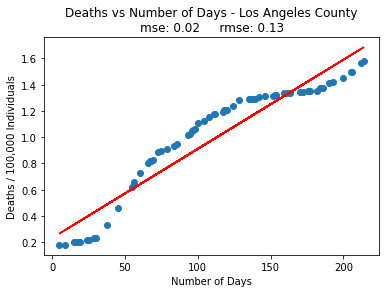

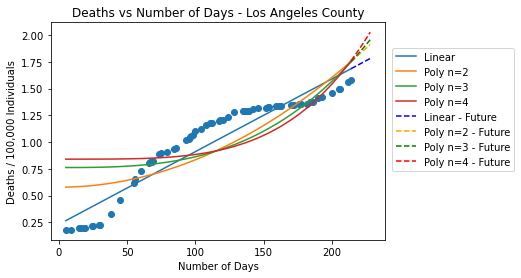

[['Linear', 0.02, 0.13], ['Poly n = 1', 0.02, 0.13], ['Poly n = 2', 0.05, 0.23], ['Poly n = 3', 0.08, 0.28], ['Poly n = 4', 0.1, 0.31]]
|    | Model      |   MSE |   RMSE |
|---:|:-----------|------:|-------:|
|  0 | Linear     |  0.02 |   0.13 |
|  1 | Poly n = 1 |  0.02 |   0.13 |
|  2 | Poly n = 2 |  0.05 |   0.23 |
|  3 | Poly n = 3 |  0.08 |   0.28 |
|  4 | Poly n = 4 |  0.1  |   0.31 |


C:\Users\leena\anaconda3\envs\MSIA\lib\site-packages\IPython\core\interactiveshell.py:3457: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  exec(code_obj, self.user_global_ns, self.user_ns)


In [18]:
# Set our x and y values for our models.
# x is number of days.
# y is number of new cases/deaths.
x_deaths = np.array(DeathsLA.index).reshape(-1, 1)
y_deaths = np.array(DeathsLA['Deaths']).reshape(-1, 1)

# Here we set up our train and test variables based on our x and y values.
xd_train,xd_test,yd_train,yd_test = train_test_split(x_deaths, y_deaths, test_size=0.3, random_state=42)

# This is our SVR training our linear model.
svr_lin_death = SVR(kernel="linear")
svr_lin_death.fit(xd_train, yd_train.ravel())

# This is our SVR training our non-linear model.
# this is using a poly regresion.
svr_poly1_death = SVR(kernel="poly", degree=1)
svr_poly2_death = SVR(kernel="poly", degree=2)
svr_poly3_death = SVR(kernel="poly", degree=3)
svr_poly4_death = SVR(kernel="poly", degree=4)

# Train the non linear model.
svr_poly1_death.fit(xd_train, yd_train.ravel())
svr_poly2_death.fit(xd_train, yd_train.ravel())
svr_poly3_death.fit(xd_train, yd_train.ravel())
svr_poly4_death.fit(xd_train, yd_train.ravel())

yd_pred = svr_lin_death.predict(xd_test)
svr_lin_deathLA = svr_lin_death.predict(xd_test)


# Cases Linear model
c_mse = str(round(mean_squared_error(y_true=yd_test, y_pred=yd_pred, squared=True),2))
c_rmse =str(round(mean_squared_error(y_true=yd_test, y_pred=yd_pred, squared=False),2))


plt.scatter(xd_test, yd_test)
plt.plot(xd_test, yd_pred, color = 'red')
plt.title('Deaths vs Number of Days - Los Angeles County\nmse: ' + c_mse + '     rmse: ' + c_rmse)
plt.xlabel('Number of Days')
plt.ylabel('Deaths / 100,000 Individuals')
plt.savefig('LADeathLinear.png',  bbox_inches='tight')
plt.show()



#make our pridict variables
yd_predN1 = svr_poly1_death.predict(xd_test)
yd_predN2 = svr_poly2_death.predict(xd_test)
yd_predN3 = svr_poly3_death.predict(xd_test)
yd_predN4 = svr_poly4_death.predict(xd_test)

# predict arrays values to dataframes.
xd_testD = pd.DataFrame(xd_test, columns=['x_test'])
yd_predN1D = pd.DataFrame(yd_predN1, columns=['y_predN1'])
yd_predN2D = pd.DataFrame(yd_predN2, columns=['y_predN2'])
yd_predN3D = pd.DataFrame(yd_predN3, columns=['y_predN3'])
yd_predN4D = pd.DataFrame(yd_predN4, columns=['y_predN4'])

# concat the predict arrays with x_test values.
poly1d = pd.concat([xd_testD, yd_predN1D], axis=1)
poly2d = pd.concat([xd_testD, yd_predN2D], axis=1)
poly3d = pd.concat([xd_testD, yd_predN3D], axis=1)
poly4d = pd.concat([xd_testD, yd_predN4D], axis=1)

# Sort the values by the predict values.
poly1d = poly1d.sort_values(by=['y_predN1'], ascending=True)
poly2d = poly2d.sort_values(by=['y_predN2'], ascending=True)
poly3d = poly3d.sort_values(by=['y_predN3'], ascending=True)
poly4d = poly4d.sort_values(by=['y_predN4'], ascending=True)

####################################################################################################################

# Predicting for more days so you can see it better

x_future = np.array([214, 215,216,217,218,219,220, 221, 222, 223, 224, 225, 226, 227, 228])
x_future = x_future.reshape(-1,1)

# Future values
y_future1D = svr_poly1_death.predict(x_future)
y_future2D = svr_poly2_death.predict(x_future)
y_future3D = svr_poly3_death.predict(x_future)
y_future4D = svr_poly4_death.predict(x_future)

# Turn predicted arrays into a dataframe
x_future = pd.DataFrame(x_future, columns=['x_future'])
y_future1D = pd.DataFrame(y_future1D, columns = ['y_future1D'])
y_future2D = pd.DataFrame(y_future2D, columns = ['y_future2D'])
y_future3D = pd.DataFrame(y_future3D, columns = ['y_future3D'])
y_future4D = pd.DataFrame(y_future4D, columns = ['y_future4D'])

# Concatenate data frames together
poly1Future = pd.concat([x_future, y_future1D], axis=1)
poly2Future = pd.concat([x_future, y_future2D], axis=1)
poly3Future = pd.concat([x_future, y_future3D], axis=1)
poly4Future = pd.concat([x_future, y_future4D], axis=1)

#####################################################################################################################


# plot our values.
plt.scatter(xd_test, yd_test)
plt.plot(poly1d.x_test, poly1d.y_predN1, label="Linear")
plt.plot(poly2d.x_test, poly2d.y_predN2, label="Poly n=2")
plt.plot(poly3d.x_test, poly3d.y_predN3, label="Poly n=3")
plt.plot(poly4d.x_test, poly4d.y_predN4, label="Poly n=4")

plt.plot(poly1Future.x_future, poly1Future.y_future1D, label = "Linear - Future", linestyle='dashed', color = 'blue')
plt.plot(poly2Future.x_future, poly2Future.y_future2D, label = "Poly n=2 - Future", linestyle='dashed', color = 'orange')
plt.plot(poly3Future.x_future, poly3Future.y_future3D, label = "Poly n=3 - Future", linestyle='dashed', color = 'green')
plt.plot(poly4Future.x_future, poly4Future.y_future4D, label = "Poly n=4 - Future", linestyle='dashed', color = 'red')
plt.legend(bbox_to_anchor = (1.4, 0.6), loc='center right')



# Add titles and labels
plt.title('Deaths vs Number of Days - Los Angeles County')
plt.xlabel('Number of Days')
plt.ylabel('Deaths / 100,000 Individuals')

#plt.legend()

plt.savefig('LADeathPoly.png',  bbox_inches='tight')
plt.show()


# RMSE AND MSE
# Deaths Linear model
d_mse = round(mean_squared_error(y_true=yd_test, y_pred=yd_pred, squared=True),2)
d_rmse = round(mean_squared_error(y_true=yd_test, y_pred=yd_pred, squared=False),2)


# Deaths Non Linear model
dn1_mse = round(mean_squared_error(y_true=yd_test, y_pred=yd_predN1, squared=True),2)
dn1_rmse = round(mean_squared_error(y_true=yd_test, y_pred=yd_predN1, squared=False),2)

# for n=2
dn2_mse = round(mean_squared_error(y_true=yd_test, y_pred=yd_predN2, squared=True),2)
dn2_rmse = round(mean_squared_error(y_true=yd_test, y_pred=yd_predN2, squared=False),2)


# for n=3
dn3_mse = round(mean_squared_error(y_true=yd_test, y_pred=yd_predN3, squared=True),2)
dn3_rmse =round(mean_squared_error(y_true=yd_test, y_pred=yd_predN3, squared=False),2)


# for n=4
dn4_mse = round(mean_squared_error(y_true=yd_test, y_pred=yd_predN4, squared=True),2)
dn4_rmse = round(mean_squared_error(y_true=yd_test, y_pred=yd_predN4, squared=False),2)


# Making table out of all error values
# Calculate the skewness 

ModelStats = [["Linear", d_mse, d_rmse],
    ["Poly n = 1",dn1_mse, dn1_rmse],
    ["Poly n = 2",dn2_mse, dn2_rmse ],
    ["Poly n = 3",dn3_mse, dn3_rmse],
    ["Poly n = 4",dn4_mse, dn4_rmse ]]
 
print(ModelStats)
df2 = pd.DataFrame(ModelStats, columns =['Model', 'MSE', 'RMSE'], dtype = float) 
                                                                                      
                                                                                                
print(df2.to_markdown())

### Cases Tulare


Linear Cases Regression model:



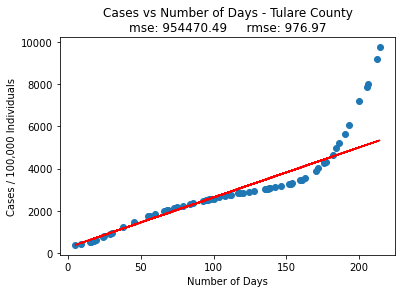

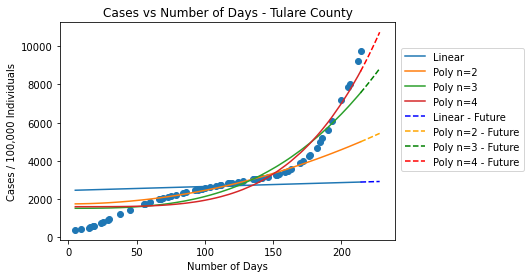

[['Linear', 954470.49, 976.97], ['Poly n = 1', 3649441.35, 1910.35], ['Poly n = 2', 1351003.87, 1162.33], ['Poly n = 3', 405774.71, 637.0], ['Poly n = 4', 337951.05, 581.34]]
|    | Model      |              MSE |    RMSE |
|---:|:-----------|-----------------:|--------:|
|  0 | Linear     | 954470           |  976.97 |
|  1 | Poly n = 1 |      3.64944e+06 | 1910.35 |
|  2 | Poly n = 2 |      1.351e+06   | 1162.33 |
|  3 | Poly n = 3 | 405775           |  637    |
|  4 | Poly n = 4 | 337951           |  581.34 |


C:\Users\leena\anaconda3\envs\MSIA\lib\site-packages\IPython\core\interactiveshell.py:3457: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  exec(code_obj, self.user_global_ns, self.user_ns)


In [19]:
# LINEAR CODE

# Set our x and y values for our models.
# x is number of days.
# y is number of new cases/deaths.
x_cases = np.array(CasesTulare.index).reshape(-1, 1)
y_cases = np.array(CasesTulare.Cases).reshape(-1, 1)

# Here we set up our train and test variables based on our x and y values.
x_train,x_test,y_train,y_test=train_test_split(x_cases, y_cases, test_size=0.3, random_state=42)

# This is our SVR training our linear model.
svr_lin = SVR(kernel="linear")
svr_lin.fit(x_train, y_train.ravel())

y_pred = svr_lin.predict(x_test)
y_predTulare = svr_lin.predict(x_test)

# Cases Linear model
print("\nLinear Cases Regression model:\n")
c_mse = str(round(mean_squared_error(y_true=y_test, y_pred=y_pred, squared=True),2))
c_rmse =str(round(mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False),2))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color = 'red')
plt.title('Cases vs Number of Days - Tulare County\nmse: ' + c_mse + '     rmse: ' + c_rmse)
plt.xlabel('Number of Days')
plt.ylabel('Cases / 100,000 Individuals')

plt.savefig('TulareCasesLinear.png',  bbox_inches='tight')
plt.show()

# POLYNOMIAL CODE

# This is our SVR training our non-linear model.
# this is using a poly regresion.
svr_poly1 = SVR(kernel="poly", degree=1)
svr_poly2 = SVR(kernel="poly", degree=2)
svr_poly3 = SVR(kernel="poly", degree=3)
svr_poly4 = SVR(kernel="poly", degree=4)

# Train the non linear model.
svr_poly1.fit(x_train, y_train.ravel())
svr_poly2.fit(x_train, y_train.ravel())
svr_poly3.fit(x_train, y_train.ravel())
svr_poly4.fit(x_train, y_train.ravel())

#make our pridict variables
y_predN1 = svr_poly1.predict(x_test)
y_predN2 = svr_poly2.predict(x_test)
y_predN3 = svr_poly3.predict(x_test)
y_predN4 = svr_poly4.predict(x_test)

# predict arrays values to dataframes.
x_testD = pd.DataFrame(x_test, columns=['x_test'])
y_predN1D = pd.DataFrame(y_predN1, columns=['y_predN1'])
y_predN2D = pd.DataFrame(y_predN2, columns=['y_predN2'])
y_predN3D = pd.DataFrame(y_predN3, columns=['y_predN3'])
y_predN4D = pd.DataFrame(y_predN4, columns=['y_predN4'])

# concat the predict arrays with x_test values
poly1 = pd.concat([x_testD, y_predN1D], axis=1)
poly2 = pd.concat([x_testD, y_predN2D], axis=1)
poly3 = pd.concat([x_testD, y_predN3D], axis=1)
poly4 = pd.concat([x_testD, y_predN4D], axis=1)

# Sort the values by the predict values.
poly1 = poly1.sort_values(by=['y_predN1'], ascending=True)
poly2 = poly2.sort_values(by=['y_predN2'], ascending=True)
poly3 = poly3.sort_values(by=['y_predN3'], ascending=True)
poly4 = poly4.sort_values(by=['y_predN4'], ascending=True)

####################################################################################################################

# Predicting for more days so you can see it better

x_future = np.array([214, 215,216,217,218,219,220, 221, 222, 223, 224, 225, 226, 227, 228])
x_future = x_future.reshape(-1,1)

# Future values
y_future1D = svr_poly1.predict(x_future)
y_future2D = svr_poly2.predict(x_future)
y_future3D = svr_poly3.predict(x_future)
y_future4D = svr_poly4.predict(x_future)

# Turn predicted arrays into a dataframe
x_future = pd.DataFrame(x_future, columns=['x_future'])
y_future1D = pd.DataFrame(y_future1D, columns = ['y_future1D'])
y_future2D = pd.DataFrame(y_future2D, columns = ['y_future2D'])
y_future3D = pd.DataFrame(y_future3D, columns = ['y_future3D'])
y_future4D = pd.DataFrame(y_future4D, columns = ['y_future4D'])

# Concatenate data frames together
poly1Future = pd.concat([x_future, y_future1D], axis=1)
poly2Future = pd.concat([x_future, y_future2D], axis=1)
poly3Future = pd.concat([x_future, y_future3D], axis=1)
poly4Future = pd.concat([x_future, y_future4D], axis=1)

#####################################################################################################################

# plot our values.
plt.scatter(x_test, y_test)
#plt.plot(x_test, y_pred, label = 'Linear')
plt.plot(poly1.x_test, poly1.y_predN1, label="Linear")
plt.plot(poly2.x_test, poly2.y_predN2, label="Poly n=2")
plt.plot(poly3.x_test, poly3.y_predN3, label="Poly n=3")
plt.plot(poly4.x_test, poly4.y_predN4, label="Poly n=4")

plt.plot(poly1Future.x_future, poly1Future.y_future1D, label = "Linear - Future", linestyle='dashed', color = 'blue')
plt.plot(poly2Future.x_future, poly2Future.y_future2D, label = "Poly n=2 - Future", linestyle='dashed', color = 'orange')
plt.plot(poly3Future.x_future, poly3Future.y_future3D, label = "Poly n=3 - Future", linestyle='dashed', color = 'green')
plt.plot(poly4Future.x_future, poly4Future.y_future4D, label = "Poly n=4 - Future", linestyle='dashed', color = 'red')
plt.legend(bbox_to_anchor = (1.4, 0.6), loc='center right')


# Add titles and labels
plt.title('Cases vs Number of Days - Tulare County')
plt.xlabel('Number of Days')
plt.ylabel('Cases / 100,000 Individuals')

#plt.legend()
plt.savefig('TulareCasesPolynomial.png',  bbox_inches='tight')
plt.show()


# working on table with RMSE and MSE for CASES

# LInear
c_mse =round(mean_squared_error(y_true=y_test, y_pred=y_pred, squared=True),2)
c_rmse =round(mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False),2)
# Cases Non Linear model
cn1_mse = round(mean_squared_error(y_true=y_test, y_pred=y_predN1, squared=True),2)
cn1_rmse = round(mean_squared_error(y_true=y_test, y_pred=y_predN1, squared=False),2)

# for n=2
cn2_mse = round(mean_squared_error(y_true=y_test, y_pred=y_predN2, squared=True),2)
cn2_rmse = round(mean_squared_error(y_true=y_test, y_pred=y_predN2, squared=False),2)

# for n=3
cn3_mse = round(mean_squared_error(y_true=y_test, y_pred=y_predN3, squared=True),2)
cn3_rmse = round(mean_squared_error(y_true=y_test, y_pred=y_predN3, squared=False),2)


# for n=4
cn4_mse = round(mean_squared_error(y_true=y_test, y_pred=y_predN4, squared=True),2)
cn4_rmse = round(mean_squared_error(y_true=y_test, y_pred=y_predN4, squared=False),2)


# Calculate the skewness 

ModelStats = [["Linear", c_mse, c_rmse],
    ["Poly n = 1",cn1_mse, cn1_rmse],
    ["Poly n = 2",cn2_mse, cn2_rmse ],
    ["Poly n = 3",cn3_mse, cn3_rmse],
    ["Poly n = 4",cn4_mse, cn4_rmse ]]
 
print(ModelStats)
df2 = pd.DataFrame(ModelStats, columns =['Model', 'MSE', 'RMSE'], dtype = float) 
                                                                                      
                                                                                                
print(df2.to_markdown())



### Deaths Tulare

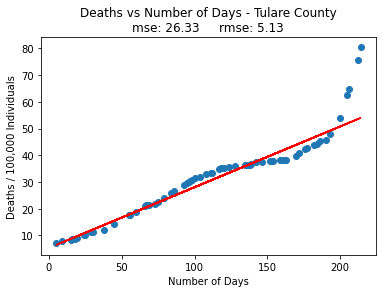

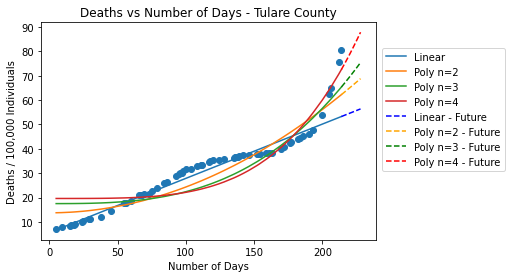

[['Linear', 26.33, 5.13], ['Poly n = 1', 27.64, 5.26], ['Poly n = 2', 28.36, 5.33], ['Poly n = 3', 42.39, 6.51], ['Poly n = 4', 50.59, 7.11]]
|    | Model      |   MSE |   RMSE |
|---:|:-----------|------:|-------:|
|  0 | Linear     | 26.33 |   5.13 |
|  1 | Poly n = 1 | 27.64 |   5.26 |
|  2 | Poly n = 2 | 28.36 |   5.33 |
|  3 | Poly n = 3 | 42.39 |   6.51 |
|  4 | Poly n = 4 | 50.59 |   7.11 |


C:\Users\leena\anaconda3\envs\MSIA\lib\site-packages\IPython\core\interactiveshell.py:3457: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  exec(code_obj, self.user_global_ns, self.user_ns)


In [20]:
# Set our x and y values for our models.
# x is number of days.
# y is number of new cases/deaths.
x_deaths = np.array(DeathsTulare.index).reshape(-1, 1)
y_deaths = np.array(DeathsTulare['Deaths']).reshape(-1, 1)

# Here we set up our train and test variables based on our x and y values.
xd_train,xd_test,yd_train,yd_test = train_test_split(x_deaths, y_deaths, test_size=0.3, random_state=42)

# This is our SVR training our linear model.
svr_lin_death = SVR(kernel="linear")
svr_lin_death.fit(xd_train, yd_train.ravel())

# This is our SVR training our non-linear model.
# this is using a poly regresion.
svr_poly1_death = SVR(kernel="poly", degree=1)
svr_poly2_death = SVR(kernel="poly", degree=2)
svr_poly3_death = SVR(kernel="poly", degree=3)
svr_poly4_death = SVR(kernel="poly", degree=4)

# Train the non linear model.
svr_poly1_death.fit(xd_train, yd_train.ravel())
svr_poly2_death.fit(xd_train, yd_train.ravel())
svr_poly3_death.fit(xd_train, yd_train.ravel())
svr_poly4_death.fit(xd_train, yd_train.ravel())

yd_pred = svr_lin_death.predict(xd_test)
svr_lin_deathTulare = svr_lin_death.predict(xd_test)


# Cases Linear model
c_mse = str(round(mean_squared_error(y_true=yd_test, y_pred=yd_pred, squared=True),2))
c_rmse =str(round(mean_squared_error(y_true=yd_test, y_pred=yd_pred, squared=False),2))


plt.scatter(xd_test, yd_test)
plt.plot(xd_test, yd_pred, color = 'red')
plt.title('Deaths vs Number of Days - Tulare County\nmse: ' + c_mse + '     rmse: ' + c_rmse)
plt.xlabel('Number of Days')
plt.ylabel('Deaths / 100,000 Individuals')
plt.savefig('TulareDeathLinear.png',  bbox_inches='tight')
plt.show()



#make our pridict variables
yd_predN1 = svr_poly1_death.predict(xd_test)
yd_predN2 = svr_poly2_death.predict(xd_test)
yd_predN3 = svr_poly3_death.predict(xd_test)
yd_predN4 = svr_poly4_death.predict(xd_test)

# predict arrays values to dataframes.
xd_testD = pd.DataFrame(xd_test, columns=['x_test'])
yd_predN1D = pd.DataFrame(yd_predN1, columns=['y_predN1'])
yd_predN2D = pd.DataFrame(yd_predN2, columns=['y_predN2'])
yd_predN3D = pd.DataFrame(yd_predN3, columns=['y_predN3'])
yd_predN4D = pd.DataFrame(yd_predN4, columns=['y_predN4'])

# concat the predict arrays with x_test values.
poly1d = pd.concat([xd_testD, yd_predN1D], axis=1)
poly2d = pd.concat([xd_testD, yd_predN2D], axis=1)
poly3d = pd.concat([xd_testD, yd_predN3D], axis=1)
poly4d = pd.concat([xd_testD, yd_predN4D], axis=1)

# Sort the values by the predict values.
poly1d = poly1d.sort_values(by=['y_predN1'], ascending=True)
poly2d = poly2d.sort_values(by=['y_predN2'], ascending=True)
poly3d = poly3d.sort_values(by=['y_predN3'], ascending=True)
poly4d = poly4d.sort_values(by=['y_predN4'], ascending=True)

####################################################################################################################

# Predicting for more days so you can see it better

x_future = np.array([214, 215,216,217,218,219,220, 221, 222, 223, 224, 225, 226, 227, 228])
x_future = x_future.reshape(-1,1)

# Future values
y_future1D = svr_poly1_death.predict(x_future)
y_future2D = svr_poly2_death.predict(x_future)
y_future3D = svr_poly3_death.predict(x_future)
y_future4D = svr_poly4_death.predict(x_future)

# Turn predicted arrays into a dataframe
x_future = pd.DataFrame(x_future, columns=['x_future'])
y_future1D = pd.DataFrame(y_future1D, columns = ['y_future1D'])
y_future2D = pd.DataFrame(y_future2D, columns = ['y_future2D'])
y_future3D = pd.DataFrame(y_future3D, columns = ['y_future3D'])
y_future4D = pd.DataFrame(y_future4D, columns = ['y_future4D'])

# Concatenate data frames together
poly1Future = pd.concat([x_future, y_future1D], axis=1)
poly2Future = pd.concat([x_future, y_future2D], axis=1)
poly3Future = pd.concat([x_future, y_future3D], axis=1)
poly4Future = pd.concat([x_future, y_future4D], axis=1)

#####################################################################################################################


# plot our values.
plt.scatter(xd_test, yd_test)
plt.plot(poly1d.x_test, poly1d.y_predN1, label="Linear")
plt.plot(poly2d.x_test, poly2d.y_predN2, label="Poly n=2")
plt.plot(poly3d.x_test, poly3d.y_predN3, label="Poly n=3")
plt.plot(poly4d.x_test, poly4d.y_predN4, label="Poly n=4")

plt.plot(poly1Future.x_future, poly1Future.y_future1D, label = "Linear - Future", linestyle='dashed', color = 'blue')
plt.plot(poly2Future.x_future, poly2Future.y_future2D, label = "Poly n=2 - Future", linestyle='dashed', color = 'orange')
plt.plot(poly3Future.x_future, poly3Future.y_future3D, label = "Poly n=3 - Future", linestyle='dashed', color = 'green')
plt.plot(poly4Future.x_future, poly4Future.y_future4D, label = "Poly n=4 - Future", linestyle='dashed', color = 'red')
plt.legend(bbox_to_anchor = (1.4, 0.6), loc='center right')



# Add titles and labels
plt.title('Deaths vs Number of Days - Tulare County')
plt.xlabel('Number of Days')
plt.ylabel('Deaths / 100,000 Individuals')

#plt.legend()

plt.savefig('TulareDeathPoly.png',  bbox_inches='tight')
plt.show()


# RMSE AND MSE
# Deaths Linear model
d_mse = round(mean_squared_error(y_true=yd_test, y_pred=yd_pred, squared=True),2)
d_rmse = round(mean_squared_error(y_true=yd_test, y_pred=yd_pred, squared=False),2)


# Deaths Non Linear model
dn1_mse = round(mean_squared_error(y_true=yd_test, y_pred=yd_predN1, squared=True),2)
dn1_rmse = round(mean_squared_error(y_true=yd_test, y_pred=yd_predN1, squared=False),2)

# for n=2
dn2_mse = round(mean_squared_error(y_true=yd_test, y_pred=yd_predN2, squared=True),2)
dn2_rmse = round(mean_squared_error(y_true=yd_test, y_pred=yd_predN2, squared=False),2)


# for n=3
dn3_mse = round(mean_squared_error(y_true=yd_test, y_pred=yd_predN3, squared=True),2)
dn3_rmse =round(mean_squared_error(y_true=yd_test, y_pred=yd_predN3, squared=False),2)


# for n=4
dn4_mse = round(mean_squared_error(y_true=yd_test, y_pred=yd_predN4, squared=True),2)
dn4_rmse = round(mean_squared_error(y_true=yd_test, y_pred=yd_predN4, squared=False),2)


# Making table out of all error values
# Calculate the skewness 

ModelStats = [["Linear", d_mse, d_rmse],
    ["Poly n = 1",dn1_mse, dn1_rmse],
    ["Poly n = 2", dn2_mse, dn2_rmse ],
    ["Poly n = 3",dn3_mse, dn3_rmse],
    ["Poly n = 4",dn4_mse, dn4_rmse ]]
 
print(ModelStats)
df2 = pd.DataFrame(ModelStats, columns =['Model', 'MSE', 'RMSE'], dtype = float) 
                                                                                      
                                                                                                
print(df2.to_markdown())

### Cases Santa Barbara


Linear Cases Regression model:



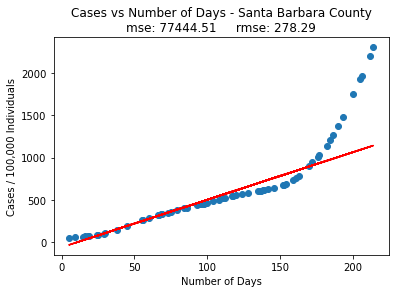

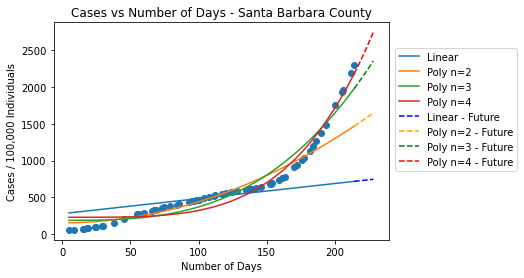

[['Linear', 77444.51, 278.29], ['Poly n = 1', 186418.63, 431.76], ['Poly n = 2', 38612.59, 196.5], ['Poly n = 3', 14392.29, 119.97], ['Poly n = 4', 11899.5, 109.08]]
|    | Model      |      MSE |   RMSE |
|---:|:-----------|---------:|-------:|
|  0 | Linear     |  77444.5 | 278.29 |
|  1 | Poly n = 1 | 186419   | 431.76 |
|  2 | Poly n = 2 |  38612.6 | 196.5  |
|  3 | Poly n = 3 |  14392.3 | 119.97 |
|  4 | Poly n = 4 |  11899.5 | 109.08 |


C:\Users\leena\anaconda3\envs\MSIA\lib\site-packages\IPython\core\interactiveshell.py:3457: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  exec(code_obj, self.user_global_ns, self.user_ns)


In [21]:
# LINEAR CODE

# Set our x and y values for our models.
# x is number of days.
# y is number of new cases/deaths.
x_cases = np.array(CasesSB.index).reshape(-1, 1)
y_cases = np.array(CasesSB.Cases).reshape(-1, 1)

# Here we set up our train and test variables based on our x and y values.
x_train,x_test,y_train,y_test=train_test_split(x_cases, y_cases, test_size=0.3, random_state=42)

# This is our SVR training our linear model.
svr_lin = SVR(kernel="linear")
svr_lin.fit(x_train, y_train.ravel())

y_pred = svr_lin.predict(x_test)
y_predSB = svr_lin.predict(x_test)

# Cases Linear model
print("\nLinear Cases Regression model:\n")
c_mse = str(round(mean_squared_error(y_true=y_test, y_pred=y_pred, squared=True),2))
c_rmse =str(round(mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False),2))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color = 'red')
plt.title('Cases vs Number of Days - Santa Barbara County\nmse: ' + c_mse + '     rmse: ' + c_rmse)
plt.xlabel('Number of Days')
plt.ylabel('Cases / 100,000 Individuals')

plt.savefig('SBCasesLinear.png',  bbox_inches='tight')
plt.show()

# POLYNOMIAL CODE

# This is our SVR training our non-linear model.
# this is using a poly regresion.
svr_poly1 = SVR(kernel="poly", degree=1)
svr_poly2 = SVR(kernel="poly", degree=2)
svr_poly3 = SVR(kernel="poly", degree=3)
svr_poly4 = SVR(kernel="poly", degree=4)

# Train the non linear model.
svr_poly1.fit(x_train, y_train.ravel())
svr_poly2.fit(x_train, y_train.ravel())
svr_poly3.fit(x_train, y_train.ravel())
svr_poly4.fit(x_train, y_train.ravel())

#make our pridict variables
y_predN1 = svr_poly1.predict(x_test)
y_predN2 = svr_poly2.predict(x_test)
y_predN3 = svr_poly3.predict(x_test)
y_predN4 = svr_poly4.predict(x_test)

# predict arrays values to dataframes.
x_testD = pd.DataFrame(x_test, columns=['x_test'])
y_predN1D = pd.DataFrame(y_predN1, columns=['y_predN1'])
y_predN2D = pd.DataFrame(y_predN2, columns=['y_predN2'])
y_predN3D = pd.DataFrame(y_predN3, columns=['y_predN3'])
y_predN4D = pd.DataFrame(y_predN4, columns=['y_predN4'])

# concat the predict arrays with x_test values
poly1 = pd.concat([x_testD, y_predN1D], axis=1)
poly2 = pd.concat([x_testD, y_predN2D], axis=1)
poly3 = pd.concat([x_testD, y_predN3D], axis=1)
poly4 = pd.concat([x_testD, y_predN4D], axis=1)

# Sort the values by the predict values.
poly1 = poly1.sort_values(by=['y_predN1'], ascending=True)
poly2 = poly2.sort_values(by=['y_predN2'], ascending=True)
poly3 = poly3.sort_values(by=['y_predN3'], ascending=True)
poly4 = poly4.sort_values(by=['y_predN4'], ascending=True)

####################################################################################################################

# Predicting for more days so you can see it better

x_future = np.array([214, 215,216,217,218,219,220, 221, 222, 223, 224, 225, 226, 227, 228])
x_future = x_future.reshape(-1,1)

# Future values
y_future1D = svr_poly1.predict(x_future)
y_future2D = svr_poly2.predict(x_future)
y_future3D = svr_poly3.predict(x_future)
y_future4D = svr_poly4.predict(x_future)

# Turn predicted arrays into a dataframe
x_future = pd.DataFrame(x_future, columns=['x_future'])
y_future1D = pd.DataFrame(y_future1D, columns = ['y_future1D'])
y_future2D = pd.DataFrame(y_future2D, columns = ['y_future2D'])
y_future3D = pd.DataFrame(y_future3D, columns = ['y_future3D'])
y_future4D = pd.DataFrame(y_future4D, columns = ['y_future4D'])

# Concatenate data frames together
poly1Future = pd.concat([x_future, y_future1D], axis=1)
poly2Future = pd.concat([x_future, y_future2D], axis=1)
poly3Future = pd.concat([x_future, y_future3D], axis=1)
poly4Future = pd.concat([x_future, y_future4D], axis=1)

#####################################################################################################################

# plot our values.
plt.scatter(x_test, y_test)
#plt.plot(x_test, y_pred, label = 'Linear')
plt.plot(poly1.x_test, poly1.y_predN1, label="Linear")
plt.plot(poly2.x_test, poly2.y_predN2, label="Poly n=2")
plt.plot(poly3.x_test, poly3.y_predN3, label="Poly n=3")
plt.plot(poly4.x_test, poly4.y_predN4, label="Poly n=4")

plt.plot(poly1Future.x_future, poly1Future.y_future1D, label = "Linear - Future", linestyle='dashed', color = 'blue')
plt.plot(poly2Future.x_future, poly2Future.y_future2D, label = "Poly n=2 - Future", linestyle='dashed', color = 'orange')
plt.plot(poly3Future.x_future, poly3Future.y_future3D, label = "Poly n=3 - Future", linestyle='dashed', color = 'green')
plt.plot(poly4Future.x_future, poly4Future.y_future4D, label = "Poly n=4 - Future", linestyle='dashed', color = 'red')
plt.legend(bbox_to_anchor = (1.4, 0.6), loc='center right')


# Add titles and labels
plt.title('Cases vs Number of Days - Santa Barbara County')
plt.xlabel('Number of Days')
plt.ylabel('Cases / 100,000 Individuals')

#plt.legend()
plt.savefig('SBCasesPolynomial.png',  bbox_inches='tight')
plt.show()


# working on table with RMSE and MSE for CASES

# LInear
c_mse =round(mean_squared_error(y_true=y_test, y_pred=y_pred, squared=True),2)
c_rmse =round(mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False),2)
# Cases Non Linear model
cn1_mse = round(mean_squared_error(y_true=y_test, y_pred=y_predN1, squared=True),2)
cn1_rmse = round(mean_squared_error(y_true=y_test, y_pred=y_predN1, squared=False),2)

# for n=2
cn2_mse = round(mean_squared_error(y_true=y_test, y_pred=y_predN2, squared=True),2)
cn2_rmse = round(mean_squared_error(y_true=y_test, y_pred=y_predN2, squared=False),2)

# for n=3
cn3_mse = round(mean_squared_error(y_true=y_test, y_pred=y_predN3, squared=True),2)
cn3_rmse = round(mean_squared_error(y_true=y_test, y_pred=y_predN3, squared=False),2)


# for n=4
cn4_mse = round(mean_squared_error(y_true=y_test, y_pred=y_predN4, squared=True),2)
cn4_rmse = round(mean_squared_error(y_true=y_test, y_pred=y_predN4, squared=False),2)


# Calculate the skewness 

ModelStats = [["Linear", c_mse, c_rmse],
    ["Poly n = 1",cn1_mse, cn1_rmse],
    ["Poly n = 2",cn2_mse, cn2_rmse ],
    ["Poly n = 3",cn3_mse, cn3_rmse],
    ["Poly n = 4",cn4_mse, cn4_rmse ]]
 
print(ModelStats)
df2 = pd.DataFrame(ModelStats, columns =['Model', 'MSE', 'RMSE'], dtype = float) 
                                                                                      
                                                                                                
print(df2.to_markdown())



### Deaths Santa Barbara

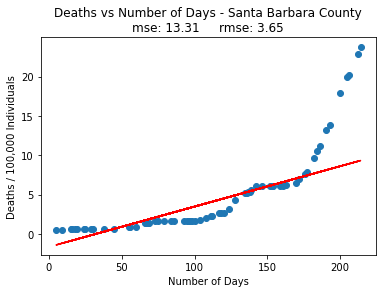

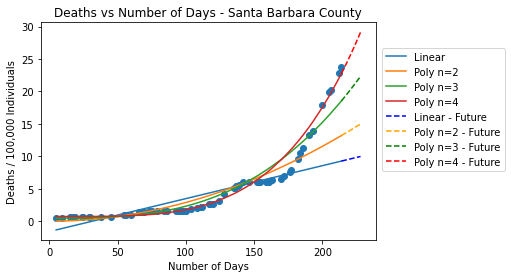

[['Linear', 13.31, 3.65], ['Poly n = 1', 13.43, 3.66], ['Poly n = 2', 6.59, 2.57], ['Poly n = 3', 2.24, 1.5], ['Poly n = 4', 1.17, 1.08]]
|    | Model      |   MSE |   RMSE |
|---:|:-----------|------:|-------:|
|  0 | Linear     | 13.31 |   3.65 |
|  1 | Poly n = 1 | 13.43 |   3.66 |
|  2 | Poly n = 2 |  6.59 |   2.57 |
|  3 | Poly n = 3 |  2.24 |   1.5  |
|  4 | Poly n = 4 |  1.17 |   1.08 |


C:\Users\leena\anaconda3\envs\MSIA\lib\site-packages\IPython\core\interactiveshell.py:3457: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  exec(code_obj, self.user_global_ns, self.user_ns)


In [22]:
# Set our x and y values for our models.
# x is number of days.
# y is number of new cases/deaths.
x_deaths = np.array(DeathsSB.index).reshape(-1, 1)
y_deaths = np.array(DeathsSB['Deaths']).reshape(-1, 1)

# Here we set up our train and test variables based on our x and y values.
xd_train,xd_test,yd_train,yd_test = train_test_split(x_deaths, y_deaths, test_size=0.3, random_state=42)

# This is our SVR training our linear model.
svr_lin_death = SVR(kernel="linear")
svr_lin_death.fit(xd_train, yd_train.ravel())

# This is our SVR training our non-linear model.
# this is using a poly regresion.
svr_poly1_death = SVR(kernel="poly", degree=1)
svr_poly2_death = SVR(kernel="poly", degree=2)
svr_poly3_death = SVR(kernel="poly", degree=3)
svr_poly4_death = SVR(kernel="poly", degree=4)

# Train the non linear model.
svr_poly1_death.fit(xd_train, yd_train.ravel())
svr_poly2_death.fit(xd_train, yd_train.ravel())
svr_poly3_death.fit(xd_train, yd_train.ravel())
svr_poly4_death.fit(xd_train, yd_train.ravel())

yd_pred = svr_lin_death.predict(xd_test)
svr_lin_deathSB = svr_lin_death.predict(xd_test)


# Cases Linear model
c_mse = str(round(mean_squared_error(y_true=yd_test, y_pred=yd_pred, squared=True),2))
c_rmse =str(round(mean_squared_error(y_true=yd_test, y_pred=yd_pred, squared=False),2))


plt.scatter(xd_test, yd_test)
plt.plot(xd_test, yd_pred, color = 'red')
plt.title('Deaths vs Number of Days - Santa Barbara County\nmse: ' + c_mse + '     rmse: ' + c_rmse)
plt.xlabel('Number of Days')
plt.ylabel('Deaths / 100,000 Individuals')
plt.savefig('SBDeathLinear.png',  bbox_inches='tight')

plt.show()


#make our pridict variables
yd_predN1 = svr_poly1_death.predict(xd_test)
yd_predN2 = svr_poly2_death.predict(xd_test)
yd_predN3 = svr_poly3_death.predict(xd_test)
yd_predN4 = svr_poly4_death.predict(xd_test)

# predict arrays values to dataframes.
xd_testD = pd.DataFrame(xd_test, columns=['x_test'])
yd_predN1D = pd.DataFrame(yd_predN1, columns=['y_predN1'])
yd_predN2D = pd.DataFrame(yd_predN2, columns=['y_predN2'])
yd_predN3D = pd.DataFrame(yd_predN3, columns=['y_predN3'])
yd_predN4D = pd.DataFrame(yd_predN4, columns=['y_predN4'])

# concat the predict arrays with x_test values.
poly1d = pd.concat([xd_testD, yd_predN1D], axis=1)
poly2d = pd.concat([xd_testD, yd_predN2D], axis=1)
poly3d = pd.concat([xd_testD, yd_predN3D], axis=1)
poly4d = pd.concat([xd_testD, yd_predN4D], axis=1)

# Sort the values by the predict values.
poly1d = poly1d.sort_values(by=['y_predN1'], ascending=True)
poly2d = poly2d.sort_values(by=['y_predN2'], ascending=True)
poly3d = poly3d.sort_values(by=['y_predN3'], ascending=True)
poly4d = poly4d.sort_values(by=['y_predN4'], ascending=True)

####################################################################################################################

# Predicting for more days so you can see it better

x_future = np.array([214, 215,216,217,218,219,220, 221, 222, 223, 224, 225, 226, 227, 228])
x_future = x_future.reshape(-1,1)

# Future values
y_future1D = svr_poly1_death.predict(x_future)
y_future2D = svr_poly2_death.predict(x_future)
y_future3D = svr_poly3_death.predict(x_future)
y_future4D = svr_poly4_death.predict(x_future)

# Turn predicted arrays into a dataframe
x_future = pd.DataFrame(x_future, columns=['x_future'])
y_future1D = pd.DataFrame(y_future1D, columns = ['y_future1D'])
y_future2D = pd.DataFrame(y_future2D, columns = ['y_future2D'])
y_future3D = pd.DataFrame(y_future3D, columns = ['y_future3D'])
y_future4D = pd.DataFrame(y_future4D, columns = ['y_future4D'])

# Concatenate data frames together
poly1Future = pd.concat([x_future, y_future1D], axis=1)
poly2Future = pd.concat([x_future, y_future2D], axis=1)
poly3Future = pd.concat([x_future, y_future3D], axis=1)
poly4Future = pd.concat([x_future, y_future4D], axis=1)

#####################################################################################################################


# plot our values.
plt.scatter(xd_test, yd_test)
plt.plot(poly1d.x_test, poly1d.y_predN1, label="Linear")
plt.plot(poly2d.x_test, poly2d.y_predN2, label="Poly n=2")
plt.plot(poly3d.x_test, poly3d.y_predN3, label="Poly n=3")
plt.plot(poly4d.x_test, poly4d.y_predN4, label="Poly n=4")

plt.plot(poly1Future.x_future, poly1Future.y_future1D, label = "Linear - Future", linestyle='dashed', color = 'blue')
plt.plot(poly2Future.x_future, poly2Future.y_future2D, label = "Poly n=2 - Future", linestyle='dashed', color = 'orange')
plt.plot(poly3Future.x_future, poly3Future.y_future3D, label = "Poly n=3 - Future", linestyle='dashed', color = 'green')
plt.plot(poly4Future.x_future, poly4Future.y_future4D, label = "Poly n=4 - Future", linestyle='dashed', color = 'red')
plt.legend(bbox_to_anchor = (1.4, 0.6), loc='center right')


# Add titles and labels
plt.title('Deaths vs Number of Days - Santa Barbara County')
plt.xlabel('Number of Days')
plt.ylabel('Deaths / 100,000 Individuals')

#plt.legend()

plt.savefig('SBDeathPoly.png',  bbox_inches='tight')
plt.show()


# RMSE AND MSE
# Deaths Linear model
d_mse = round(mean_squared_error(y_true=yd_test, y_pred=yd_pred, squared=True),2)
d_rmse = round(mean_squared_error(y_true=yd_test, y_pred=yd_pred, squared=False),2)


# Deaths Non Linear model
dn1_mse = round(mean_squared_error(y_true=yd_test, y_pred=yd_predN1, squared=True),2)
dn1_rmse = round(mean_squared_error(y_true=yd_test, y_pred=yd_predN1, squared=False),2)

# for n=2
dn2_mse = round(mean_squared_error(y_true=yd_test, y_pred=yd_predN2, squared=True),2)
dn2_rmse = round(mean_squared_error(y_true=yd_test, y_pred=yd_predN2, squared=False),2)


# for n=3
dn3_mse = round(mean_squared_error(y_true=yd_test, y_pred=yd_predN3, squared=True),2)
dn3_rmse =round(mean_squared_error(y_true=yd_test, y_pred=yd_predN3, squared=False),2)


# for n=4
dn4_mse = round(mean_squared_error(y_true=yd_test, y_pred=yd_predN4, squared=True),2)
dn4_rmse = round(mean_squared_error(y_true=yd_test, y_pred=yd_predN4, squared=False),2)


# Making table out of all error values
# Calculate the skewness 

ModelStats = [["Linear", d_mse, d_rmse],
    ["Poly n = 1",dn1_mse, dn1_rmse],
    ["Poly n = 2",dn2_mse, dn2_rmse ],
    ["Poly n = 3",dn3_mse, dn3_rmse],
    ["Poly n = 4",dn4_mse, dn4_rmse ]]
 
print(ModelStats)
df2 = pd.DataFrame(ModelStats, columns =['Model', 'MSE', 'RMSE'], dtype = float) 
                                                                                      
                                                                                                
print(df2.to_markdown())

# County Comparison

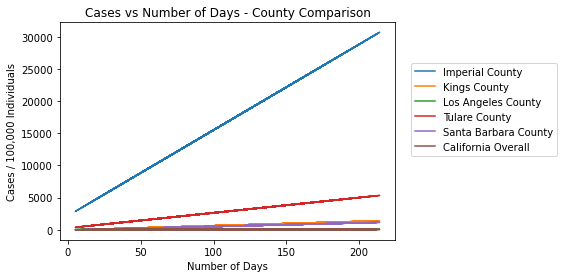

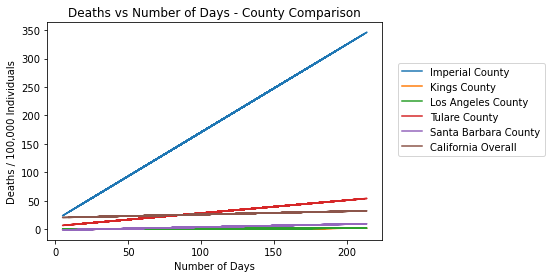

In [23]:
plt.plot(x_test, y_predImperial, label = 'Imperial County')
plt.plot(x_test, y_predKings,label = 'Kings County')
plt.plot(x_test, y_predLA, label = 'Los Angeles County')
plt.plot(x_test, y_predTulare, label = 'Tulare County')
plt.plot(x_test, y_predSB, label = 'Santa Barbara County')
plt.plot(x_test, y_predCalifornia, label = 'California Overall')


plt.title('Cases vs Number of Days - County Comparison')
plt.xlabel('Number of Days')
plt.ylabel('Cases / 100,000 Individuals')
plt.legend(bbox_to_anchor = (1.5, 0.6), loc='center right')

plt.savefig('CountyComparisonCases.png',  bbox_inches='tight')
plt.show()


plt.plot(xd_test, svr_lin_deathImperial, label = 'Imperial County')
plt.plot(xd_test, svr_lin_deathKings,label = 'Kings County')
plt.plot(xd_test, svr_lin_deathLA, label = 'Los Angeles County')
plt.plot(xd_test, svr_lin_deathTulare, label = 'Tulare County')
plt.plot(xd_test, svr_lin_deathSB, label = 'Santa Barbara County')
plt.plot(xd_test, svr_lin_deathCalifornia, label = 'California Overall')


plt.title('Deaths vs Number of Days - County Comparison')
plt.xlabel('Number of Days')
plt.ylabel('Deaths / 100,000 Individuals')
plt.legend(bbox_to_anchor = (1.5, 0.6), loc='center right')

plt.savefig('CountyComparisonsDeaths.png',  bbox_inches='tight')
plt.show()

# Enrichment Data Hypothesis Testing

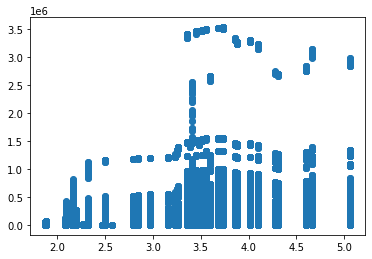

In [24]:
dfGas = pd.read_csv('EnrichmentDataGas.csv')

plt.scatter(dfGas['GasolinePrice'], dfGas['Cases'])


Pearsons correlation: 0.146


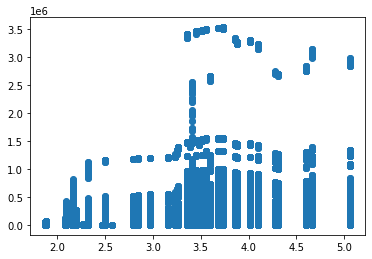

In [25]:
## This is for ALL of the data

from scipy.stats import pearsonr

plt.scatter(dfGas['GasolinePrice'], dfGas['Cases'])

# Apply the pearsonr()
corr, _ = pearsonr(dfGas['GasolinePrice'], dfGas['Cases'])
print('Pearsons correlation: %.3f' % corr)


In [26]:
dfGas = dfGas[dfGas['State']=='CA']
dfGas = dfGas[dfGas['State']=='CA']

dfGas = dfGas[(dfGas['Date'] > "2020-07-01") & (dfGas['Date'] < "2020-12-01")]


dfImperial = dfGas[dfGas['CountyFIPS'].isin([6025])]
dfKings =dfGas[dfGas['CountyFIPS'].isin([6031])]
dfLosAngeles=dfGas[dfGas['CountyFIPS'].isin([6037])]
dfTulare=dfGas[dfGas['CountyFIPS'].isin([6107])]
dfSantaBarbra=dfGas[dfGas['CountyFIPS'].isin([6083])]


corrCalifornia,_ = pearsonr(dfGas['GasolinePrice'], dfGas['Cases'])
corrImperial,_ = pearsonr(dfImperial['GasolinePrice'], dfImperial['Cases'])
corrKings,_ = pearsonr(dfKings['GasolinePrice'], dfKings['Cases'])
corrLA,_ = pearsonr(dfLosAngeles['GasolinePrice'], dfLosAngeles['Cases'])
corrTulare,_ = pearsonr(dfTulare['GasolinePrice'], dfTulare['Cases'])
corrSB,_ = pearsonr(dfSantaBarbra['GasolinePrice'], dfSantaBarbra['Cases'])

ModelStats = [["California", corrCalifornia],
    ["Imperial County",corrImperial],
    ["Kings County",corrKings ],
    ["Los Angeles County",corrLA],
    ["Tulare County",corrTulare ],
    ["Santa Barbara County",corrSB ]]
 
print(ModelStats)
df2 = pd.DataFrame(ModelStats, columns =['Model', 'Pearson Correllation Cases v Gas Prices'], dtype = float) 
                                                                                      
                                                                                                
print(df2.to_markdown())



print('Pearsons correlation: %.3f' % corr)


[['California', -0.0766342026875938], ['Imperial County', -0.7942959336204083], ['Kings County', -0.701243297337703], ['Los Angeles County', -0.7363211699718752], ['Tulare County', -0.6331123129662402], ['Santa Barbara County', -0.6352348877835063]]
|    | Model                |   Pearson Correllation Cases v Gas Prices |
|---:|:---------------------|------------------------------------------:|
|  0 | California           |                                -0.0766342 |
|  1 | Imperial County      |                                -0.794296  |
|  2 | Kings County         |                                -0.701243  |
|  3 | Los Angeles County   |                                -0.736321  |
|  4 | Tulare County        |                                -0.633112  |
|  5 | Santa Barbara County |                                -0.635235  |
Pearsons correlation: 0.146


C:\Users\leena\anaconda3\envs\MSIA\lib\site-packages\IPython\core\interactiveshell.py:3457: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  exec(code_obj, self.user_global_ns, self.user_ns)


In [27]:
# ICE CREAM

dfGas = pd.read_csv('IceCream.csv')

#plt.scatter(dfGas['IceCreamPrice'], dfGas['Cases'])
#plt.title('Ice Cream Prices v COVID-19 Cases/n')


dfGas = dfGas[dfGas['State']=='CA']
dfGas = dfGas[dfGas['State']=='CA']

dfGas = dfGas[(dfGas['Date'] > "2020-07-01") & (dfGas['Date'] < "2020-12-01")]


dfImperial = dfGas[dfGas['CountyFIPS'].isin([6025])]
dfKings =dfGas[dfGas['CountyFIPS'].isin([6031])]
dfLosAngeles=dfGas[dfGas['CountyFIPS'].isin([6037])]
dfTulare=dfGas[dfGas['CountyFIPS'].isin([6107])]
dfSantaBarbra=dfGas[dfGas['CountyFIPS'].isin([6083])]


corrCalifornia,_ = pearsonr(dfGas['IceCreamPrice'], dfGas['Cases'])
corrImperial,_ = pearsonr(dfImperial['IceCreamPrice'], dfImperial['Cases'])
corrKings,_ = pearsonr(dfKings['IceCreamPrice'], dfKings['Cases'])
corrLA,_ = pearsonr(dfLosAngeles['IceCreamPrice'], dfLosAngeles['Cases'])
corrTulare,_ = pearsonr(dfTulare['IceCreamPrice'], dfTulare['Cases'])
corrSB,_ = pearsonr(dfSantaBarbra['IceCreamPrice'], dfSantaBarbra['Cases'])

ModelStats = [["California", corrCalifornia],
    ["Imperial County",corrImperial],
    ["Kings County",corrKings ],
    ["Los Angeles County",corrLA],
    ["Tulare County",corrTulare ],
    ["Santa Barbara County",corrSB ]]
 
print(ModelStats)
df2 = pd.DataFrame(ModelStats, columns =['Model', 'Pearson Correllation Cases v Ice Cream Prices'], dtype = float) 
                                                                                      
                                                                                                
print(df2.to_markdown())



print('Pearsons correlation: %.3f' % corr)


[['California', 0.00013653809941701657], ['Imperial County', 0.001059283467651881], ['Kings County', 0.0016268259124666033], ['Los Angeles County', 0.0012884372520838875], ['Tulare County', 0.001469632029283031], ['Santa Barbara County', 0.0015230689809942457]]
|    | Model                |   Pearson Correllation Cases v Ice Cream Prices |
|---:|:---------------------|------------------------------------------------:|
|  0 | California           |                                     0.000136538 |
|  1 | Imperial County      |                                     0.00105928  |
|  2 | Kings County         |                                     0.00162683  |
|  3 | Los Angeles County   |                                     0.00128844  |
|  4 | Tulare County        |                                     0.00146963  |
|  5 | Santa Barbara County |                                     0.00152307  |
Pearsons correlation: 0.146


In [28]:
dfGas.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Cases,CountyFIPS,County Name,State,StateFIPS,Date,Deaths,population,IceCreamPrice
1035236,1035236,517618,517618,21,0,Statewide Unallocated,CA,6,2020-07-02,0,0.0,1.401
1035237,1035237,517618,517618,21,0,Statewide Unallocated,CA,6,2020-07-02,0,0.0,4.898
1035238,1035238,517619,517619,7562,6001,Alameda County,CA,6,2020-07-02,139,1671329.0,1.401
1035239,1035239,517619,517619,7562,6001,Alameda County,CA,6,2020-07-02,139,1671329.0,4.898
1035240,1035240,517620,517620,2,6003,Alpine County,CA,6,2020-07-02,0,1129.0,1.401


Member: (50 points)

Utilize Linear and Non-Linear (polynomial with degree n) regression models to compare trends for a single state (each member should choose different state) and its counties (top 5 with highest number of cases). Start your data from 2020.06.01 (Monday) to 2021.01.03 (Sunday).

X-Axis - number of days, Y-Axis number of new cases and deaths. Calcluate error using RMSE.(10 points) Identify which counties are most at risk. Model for top 5 counties with cases within a state and describe their trends. (10 points)

Perform hypothesis tests on questions identified in Stage III. (20 points) e.x. Does higher employment data (overall employment numbers) lead to higher covid case numbers or more rapid increase in covid cases.. Here you would compare the covid cases to the state or county level enrichment data to prove or disprove your null hypothesis. In this case there will be a two tail - two sample t-test to see if there is a difference and then one-tail - two sample t-test to show higher or lower. you can also make 3 new hypotheses and do hypothesis tests on them.

Depending on your type of data you can also perform Chi-square test for categorical hypothesis testing. For each of the aforemention analysis plot figures, the figures should include (20 points) trend line (based on the datasets from 2020.06.01 (Monday) to 2021.01.03 (Sunday)). prediction path (forecast 1 week). confidence intervals (error in prediction). (Further materials you may need to explore: https://lmc2179.github.io/posts/confidence_prediction.html; https://www.geeksforgeeks.org/how-to-plot-a-confidence-interval-in-python/)

We'll start by importing and manipulating our covid data.

In [29]:
from IPython.display import Image
from IPython.core.display import HTML 

#countymap = Image(url= "https://www.counties.org/sites/main/files/imagecache/lightbox/main-images/california_county_map.jpg")
 

import urllib.request 
from PIL import Image 
  
# Retrieving the resource located at the URL 
# and storing it in the file name a.png 
url = "https://www.counties.org/sites/main/files/imagecache/lightbox/main-images/california_county_map.jpg" 
urllib.request.urlretrieve(url, "countymap.png") 
  
# Opening the image and displaying it (to confirm its presence) 
img = Image.open(r"countymap.png") 
#img.show()




# Stage 4 Report  -  Leena Godbole
### November 9, 2023 - IAC-621


Note, in all the analysis below death and case data has been normalized to instances / 100,000 individuals.  All analysis is done between the dates of June 1, 2020 and January 3, 2021.

## California COVID-19 Trends from 2020.06.01 to 2021.01.03
Continuing with the analysis from previous sections on the state of California, the figures below show different ways of modeling the case and death data.  From figure 1, you can see that during this six month period in California, the data did not quite exhibit a linear shape.  There is a sharp increase in cases around day 175 that is not captured well be the linear model.  This increase in cases is due to the holiday season in the USA.

In figure 2, you can see that when the models are shifted to polynomial, they seem to follow the shape of the data more closely.  Table 1 confirms that the 4th degree polynomial model did fit the best, as it has the smallest MSE and RMSE, although none of the models are good fit per se.

____________________________________________________________________________________________________________________________

![California](CaliforniaCasesLinear.png "title")
<div style="text-align: center"> Figure 1 </div>


![California](CaliforniaCasesPolynomial.png "title")
<div style="text-align: center"> Figure 2 </div>


|    | Model      |    MSE |   RMSE |
|---:|:-----------|-------:|-------:|
|  0 | Linear     | 952.84 |  30.87 |
|  1 | Poly n = 1 | 963.36 |  31.04 |
|  2 | Poly n = 2 | 709.09 |  26.63 |
|  3 | Poly n = 3 | 482.99 |  21.98 |
|  4 | Poly n = 4 | 373.17 |  19.32 |

____________________________________________________________________________________________________________________________

The death data in California overall exhibits a very similar shape to the case data.  This makes sense as when cases sharply increase exponentially, hostpitals get overwhelmed and positive heath outcomes suffer.  Due to this sharp in deaths, we can also expect the linear model to be a poor fit.  The error summary table once again confirms, none of these models particulary capture the shape of this data, so prediction power will likely be poor.  Once again, the 4th degree polynomial fits the best in the case of California deaths from COVID-19.

![California](CaliforniaDeathLinear.png "title")
<div style="text-align: center"> Figure 3 </div>


![California](CaliforniaDeathPoly.png "title")
<div style="text-align: center"> Figure 4 </div>

|    | Model      |     MSE |   RMSE |
|---:|:-----------|--------:|-------:|
|  0 | Linear     | 1008.08 |  31.75 |
|  1 | Poly n = 1 | 1012.94 |  31.83 |
|  2 | Poly n = 2 |  796.81 |  28.23 |
|  3 | Poly n = 3 |  572.3  |  23.92 |
|  4 | Poly n = 4 |  436.57 |  20.89 |


____________________________________________________________________________________________________________________________


## California County Analysis

In section 3, the top 5 infected counties in California were identified:  Imperial County, Kings County, Los Angeles County, Tulare County, and Santa Barbara County.  All of the top affected counties are located in southern California.  The same models were done on these individual counties as were done on the whole state.

![California](countymap.png "title")
<div style="text-align: center"> Figure 5</div>


____________________________________________________________________________________________________________________________


#### Imperial County - Cases
Imperial county has a population of population of 181,215; this makes it one of the least populus county in Southern California [1].  All models fit this data quite poorly.


![Imperial](ImperialCasesLinear.png "title")
<div style="text-align: center"> Figure 6 </div>


![Imperial](ImperialCasesPolynomial.png "title")
<div style="text-align: center"> Figure 7 </div>

|    | Model      |         MSE |    RMSE |
|---:|:-----------|------------:|--------:|
|  0 | Linear     | 8.09844e+06 | 2845.78 |
|  1 | Poly n = 1 | 6.54417e+07 | 8089.6  |
|  2 | Poly n = 2 | 4.83834e+07 | 6955.82 |
|  3 | Poly n = 3 | 2.04198e+07 | 4518.83 |
|  4 | Poly n = 4 | 1.73182e+07 | 4161.51 |

#### Imperial County - Deaths

![Imperial](ImperialDeathLinear.png "title")
<div style="text-align: center"> Figure 8 </div>


![Imperial](ImperialDeathPoly.png "title")
<div style="text-align: center"> Figure 9 </div>

|    | Model      |     MSE |    RMSE |
|---:|:-----------|--------:|--------:|
|  0 | Linear     |  572.33 |   23.92 |
|  1 | Poly n = 1 |  998.75 |   31.6  |
|  2 | Poly n = 2 | 1590.37 | 6955.82 |
|  3 | Poly n = 3 | 2447.22 |   49.47 |
|  4 | Poly n = 4 | 3144.42 |   56.08 |


____________________________________________________________________________________________________________________________


#### Kings County - Cases
The population of Kings County is 152,940.  Kings county borders Tulare County, which also made it in the Top 5 per capita affected coutnies in California.  Perhaps they will have similar case and death data since they are adjacent counties.

The shape of both the death and case data in Kings County  mimics that of the State.  The death data is modeled particularly well for Kings County, so our predictive power may be the best in this county.  A few more counties will follow this trend.


![Imperial](KingsCasesLinear.png "title")
<div style="text-align: center"> Figure 10 </div>


![Imperial](KingsCasesPolynomial.png "title")
<div style="text-align: center"> Figure 11 </div>


|    | Model      |      MSE |   RMSE |
|---:|:-----------|---------:|-------:|
|  0 | Linear     | 245145   | 495.12 |
|  1 | Poly n = 1 | 536862   | 732.71 |
|  2 | Poly n = 2 | 199616   | 446.78 |
|  3 | Poly n = 3 |  72660.4 | 269.56 |
|  4 | Poly n = 4 |  44326.7 | 210.54 |

____________________________________________________________________________________________________________________________

#### Kings County - Deaths

![Imperial](KingsDeathLinear.png "title")
<div style="text-align: center"> Figure 12 </div>


![Imperial](KingsDeathPoly.png "title")
<div style="text-align: center"> Figure 13 </div>

|    | Model      |   MSE |   RMSE |
|---:|:-----------|------:|-------:|
|  0 | Linear     |  1.61 |   1.27 |
|  1 | Poly n = 1 |  1.61 |   1.27 |
|  2 | Poly n = 2 |  0.72 |   0.85 |
|  3 | Poly n = 3 |  0.42 |   0.65 |
|  4 | Poly n = 4 |  0.24 |   0.49 |

____________________________________________________________________________________________________________________________

#### Los Angeles County - Cases

Los Angeles county is best modeled by linearly for the cases.  All models for the death seem to perform middling compared to other counties.


![Imperial](LACasesLinear.png "title")
<div style="text-align: center"> Figure 14 </div>


![Imperial](LACasesPolynomial.png "title")
<div style="text-align: center"> Figure 15 </div>

|    | Model      |    MSE |   RMSE |
|---:|:-----------|-------:|-------:|
|  0 | Linear     |  73.42 |   8.57 |
|  1 | Poly n = 1 |  90.02 |   9.49 |
|  2 | Poly n = 2 | 156.41 |  12.51 |
|  3 | Poly n = 3 | 216.52 |  14.71 |
|  4 | Poly n = 4 | 265.11 |  16.28 |

____________________________________________________________________________________________________________________________

#### Los Angeles County - Deaths

![Imperial](LADeathLinear.png "title")
<div style="text-align: center"> Figure 16 </div>


![Imperial](LADeathPoly.png "title")
<div style="text-align: center"> Figure 17 </div>



|    | Model      |         MSE |     RMSE |
|---:|:-----------|------------:|---------:|
|  0 | Linear     | 0.02        |     0.13 |
|  1 | Poly n = 1 | 0.02        |     0.13 |
|  2 | Poly n = 2 |  0.05       |   0.23   |
|  3 | Poly n = 3 | 0.08        |     0.28 |
|  4 | Poly n = 4 | 0.1         |     0.31 |

____________________________________________________________________________________________________________________________

#### Tulare County - Cases


![Imperial](ImperialCasesLinear.png "title")
<div style="text-align: center"> Figure 18 </div>


![Imperial](ImperialCasesPolynomial.png "title")
<div style="text-align: center"> Figure 19 </div>

|    | Model      |              MSE |    RMSE |
|---:|:-----------|-----------------:|--------:|
|  0 | **Linear** | 954470           |  976.97 |  
|  1 | Poly n = 1 |      3.64944e+06 | 1910.35 |
|  2 | Poly n = 2 |      1.351e+06   | 1162.33 |
|  3 | Poly n = 3 | 405775           |  637    |
|  4 | Poly n = 4 | 337951           |  581.34 |

____________________________________________________________________________________________________________________________

#### Tulare County - Deaths


![Imperial](TulareDeathLinear.png "title")
<div style="text-align: center"> Figure 20</div>


![Imperial](TulareDeathPoly.png "title")
<div style="text-align: center"> Figure 21 </div>


|    | Model      |   MSE |   RMSE |
|---:|:-----------|------:|-------:|
|  0 | Linear     | 26.33 |   5.13 |
|  1 | Poly n = 1 | 27.64 |   5.26 |
|  2 | Poly n = 2 | 28.36 |   5.33 |
|  3 | Poly n = 3 | 42.39 |   6.51 |
|  4 | Poly n = 4 | 50.59 |   7.11 |


____________________________________________________________________________________________________________________________

#### Santa Barbarba - Cases

Santa Barbara's model perform poorly for the case data but well for the death data.


![Imperial](SBCasesLinear.png "title")
<div style="text-align: center"> Figure 22 </div>


![Imperial](SBCasesPolynomial.png "title")
<div style="text-align: center"> Figure 23</div>

|    | Model      |      MSE |   RMSE |
|---:|:-----------|---------:|-------:|
|  0 | Linear     |  77444.5 | 278.29 |
|  1 | Poly n = 1 | 186419   | 431.76 |
|  2 | Poly n = 2 |  38612.6 | 196.5  |
|  3 | Poly n = 3 |  14392.3 | 119.97 |
|  4 | Poly n = 4 |  11899.5 | 109.08 |
____________________________________________________________________________________________________________________________

#### Santa Barbara - Deaths

![Imperial](SBDeathLinear.png "title")
<div style="text-align: center"> Figure 24 </div>


![Imperial](SBDeathPoly.png "title")
<div style="text-align: center"> Figure 25</div>

|    | Model      |   MSE |   RMSE |
|---:|:-----------|------:|-------:|
|  0 | Linear     | 13.31 |   3.65 |
|  1 | Poly n = 1 | 13.43 |   3.66 |
|  2 | Poly n = 2 |  6.59 |   2.57 |
|  3 | Poly n = 3 |  2.24 |   1.5  |
|  4 | Poly n = 4 |  1.17 |   1.08 |
____________________________________________________________________________________________________________________________

#### County Comparison

In both cases and deaths, Imperial County experienced the highest burden of COVID-19 within the state during the months of June 2020 to December 2020.

![Imperial](CountyComparisonCases.png "title")
<div style="text-align: center"> Figure 26 </div>


![Imperial](CountyComparisonsDeaths.png "title")
<div style="text-align: center"> Figure 27</div>

____________________________________________________________________________________________________________________________

## Enrichment Data Hypothesis Testing

Due team 7 being a team of five individuals, we did not have enough given enrichment datasets provided for us all to get one.  I decided to pull consumer price index data from the Beauru of Labor Statistics.  During COVID-19, gas prices plummetted, especially in the first few months of the pandemic.  I was interested in seeing if there was a correlation between gas prices and COVID-19 cases - as the number of sick individuals increased, does gasoline prices decrease?

During stage 3, the following hypothesis were proposed:
    h0: COVID-19 cases and gasoline prices are not correlated during the months between June 1, 2020 and December 31, 2020
        aka pearsons = 0
    ha: COVID-19 cases and gasoline prices are correlated 
        proposed negative correlation: pearsons < 0
    alpha: 0.05
    degrees of freedom:  180 (n-2)
    
    
This hypothesis does not fall into the framework of the T-Tests covered in class.  I am not comparing groups, but rather two unrelated datasets.  My need is to compare the strength of the linear relationship between my two data sets.  For this reason, I have opted for the Pearson Correlation test for my hypothesis.  I looked at this hypothesis for the whole state of California as well as the individual counties discussed above.

I would like to note, the CPI data for gas is a national number recorded monthly.  It is not state or county specific, therefore it makes sense for the relationship to be stronger in the worse counties versus the state average.  Additionally, pearons correlation does not output a p-value, rather it outputs the pearson's correlation coefficient, so the interpretation is different, see table below:



|    | Strength of association |   Pearson's Coefficient     |
|---:|:------------------------|------------------:|
|  0 | small                   | +/- (0.01 - 0.03) |
|  1 | medium                  | +/- (0.3- 0.5)    |
|  2 | large                   | +/- (0.5 - 1.0)   |



With that being said, you can see that there is a strong negative correlation between gasoine and COVID-19 cases at the county level.  Using Pearsons R table [2], alpha, and degrees of freedom, I got a critical **Pearsons value of 0.87 to accept or reject the null.  With that threshold defined, we fail to reject all the null hypothesis. **


|    | Model                |   Pearson Correllation Cases v Gas Prices |
|---:|:---------------------|------------------------------------------:|
|  0 | California           |                                -0.0766342 |
|  1 | Imperial County      |                                -0.794296  |
|  2 | Kings County         |                                -0.701243  |
|  3 | Los Angeles County   |                                -0.736321  |
|  4 | Tulare County        |                                -0.633112  |
|  5 | Santa Barbara County |                                -0.635235  |


For fun, I decided to look at Ice Cream as it related to COVID-19 cases.  As you can see, there is no correlation between the ice cream and COVID-19 Cases. 

|    | Model                |   Pearson Correllation Cases v Ice Cream Prices |
|---:|:---------------------|------------------------------------------------:|
|  0 | California           |                                     0.000136538 |
|  1 | Imperial County      |                                     0.00105928  |
|  2 | Kings County         |                                     0.00162683  |
|  3 | Los Angeles County   |                                     0.00128844  |
|  4 | Tulare County        |                                     0.00146963  |
|  5 | Santa Barbara County |                                     0.00152307  |


### References
[1] https://web.archive.org/web/20110805085411/http://quickfacts.census.gov/qfd/states/06/06025.html \
[2] https://www.researchgate.net/figure/Critical-values-for-Pearsons-correlation-coefficient-r_tbl2_241765976






In [30]:
popKings

152940